In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">Introduction
</div>


This project provides a comprehensive analysis of the **US stock market**, with a focus on company fundamentals, financial health, industry performance, and geographical distribution. The goal is to prepare, clean, and explore raw market data in order to identify key patterns, trends, and insights that help explain the dynamics of US-listed companies and their global context.  

The analysis is structured into several parts:  

1. **Data Preparation & Cleaning**  
   - Ensuring high-quality datasets by handling missing values (NaN) and preparing raw data for exploration.  

2. **State-Level Analysis**  
   - Breaking down market capitalization, EBITDA, and employment across US states to understand regional contributions to the stock market.  

3. **Industry Insights**  
   - Evaluating top and bottom industries using key financial metrics such as liquidity ratios, cash flows, and market capitalization.  

4. **Distributions**  
   - Exploring statistical distributions of core indicators including analysts’ coverage, beta, dividends, and 52-week price changes.  

5. **Comparative & Visual Analytics**  
   - Providing deeper insights through sector-based comparisons, growth trends, valuation ratios, and cross-country analyses.  
   - Includes visualizations of revenue vs earnings growth, dividends by sector, margins (radar charts), and relative performance of major companies and sectors.  

---

Overall, the project combines **financial analysis, market structure exploration, and visualization techniques** to present a detailed picture of the US stock market and its interaction with global markets.  
The outputs are designed to support **investment analysis, risk assessment, and strategic decision-making**.  


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">Structure of the Project

</div>

1. Raw Data Preparation  
2. Analysis of NaN  

3. US Stock Market by State  
 3.1 Market Cap  
 3.2 EBITDA  
 3.3 Employees  

4. Industries  
 4.1 Year to Date  
 4.2 Quick Ratio  
 4.3 Current Ratio  
 4.4 Avg. Volume  
 4.5 Avg. Beta  
 4.6 Net Debt to EBITDA  
 4.7 Free Cash Flow  
 4.8 Operating Cash Flow  
 4.9 Market Capitalization  

5. Distributions  
 5.1 Analysts  
 5.2 Beta  
 5.3 Dividends  
 5.4 52 Weeks Change  

6. Other Stock Graphics  
 6.1 Revenue vs Earnings Growth  
 6.2 Growth Bars  
 6.3 Dividends by Sector  
 6.4 Top 15 S&P 500 Banks & Insurers  
 6.5 Top 10 Stocks vs S&P 500 & Rest 2000  
 6.6 US vs Non-US Market Cap & Employees  
 6.7 Trailing PE vs Forward PE  
 6.8 ROE vs ROA  
 6.9 EV/EBITDA vs ROE  
 6.10 Margins (Radar)  
 6.11 Top 10 Countries outside US  
 6.12 Top Dividend Stocks (S&P vs Non-S&P)  
 6.13 Earnings vs Revenue  
 6.14 Market Cap vs Enterprise Value  
 6.15 P/E Ratios (Trailing vs Forward)  



<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">1. Row Data Preparation
</div>

In [4]:
data = pd.read_csv('raw_data_for_stocks.csv').drop_duplicates(subset =['Symbol'])
changes = pd.read_csv('changes_in_price.csv').drop_duplicates(subset =['Symbol'])

In [5]:
data, changes = data.round(2), changes.round(2)

In [6]:
# Merge 'changes' into 'data' based on 'Symbol'
merged_data = pd.merge(data, changes, on='Symbol', how='left')
merged_data

,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,ROE,...,Opp_Type,SP500,Change_2d,Change_5d,Change_10d,Change_30d,Change_60d,Change_180d,MTD Change,YTD Change
0,NVIDIA Corporation,NVDA,4448.63,4367.38,180.77,148.51,88.25,59.03,44.3,1.15,...,Good Opp,S&P 500,0.02,0.05,0.04,0.12,0.28,0.41,0.05,0.36
1,Microsoft Corporation,MSFT,3884.50,3889.11,520.84,281.72,156.53,38.28,35.0,0.33,...,Good Opp,S&P 500,-0.01,-0.01,0.02,0.03,0.10,0.28,-0.01,0.24
2,Apple Inc.,AAPL,3309.85,3311.66,220.03,408.62,141.70,33.79,26.8,1.50,...,Neutral,S&P 500,0.05,0.10,0.06,0.06,0.11,-0.02,0.10,-0.11
3,"Amazon.com, Inc.",AMZN,2376.99,2446.05,223.13,670.04,133.83,33.98,36.2,0.25,...,Good Opp,S&P 500,0.00,0.04,-0.03,0.00,0.03,-0.03,0.04,0.02
4,"Meta Platforms, Inc.",META,1924.19,1916.31,761.83,178.80,94.28,27.77,30.3,0.41,...,Good Opp,S&P 500,-0.01,0.02,0.09,0.04,0.10,0.07,0.02,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,140779,BF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Neutral,No S&P 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,"First Citizens BancShares, Inc.",FCNCO,NaN,13.00,23.28,8.98,NaN,0.41,NaN,0.11,...,Neutral,No S&P 500,0.00,0.00,0.04,0.02,0.08,0.07,0.00,0.08
1901,Texas Capital Funds Trust Texas,TXS,NaN,NaN,34.48,NaN,NaN,21.01,NaN,NaN,...,Neutral,No S&P 500,-0.01,0.00,-0.02,-0.01,0.02,0.04,0.00,0.07
1902,"Stericycle, Inc.",SRCL,NaN,NaN,61.47,NaN,NaN,NaN,NaN,NaN,...,Neutral,No S&P 500,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">2. Analysis of NaN
</div>

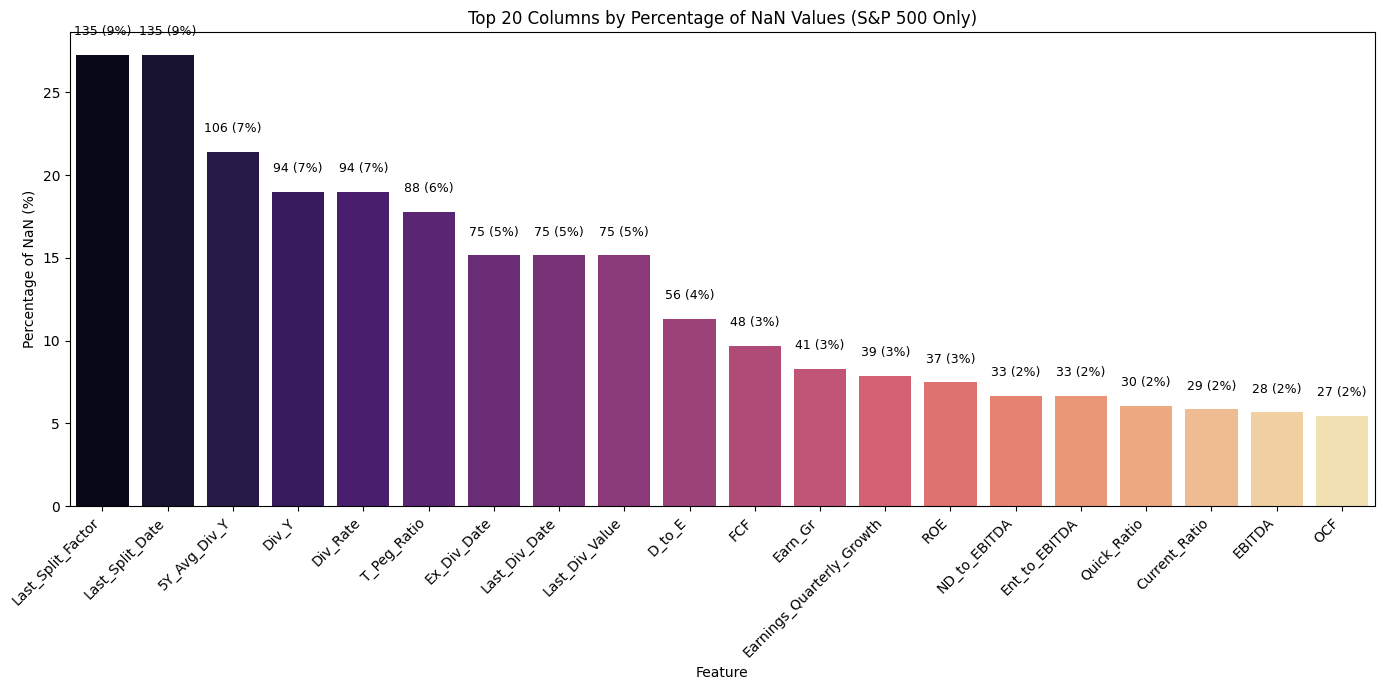

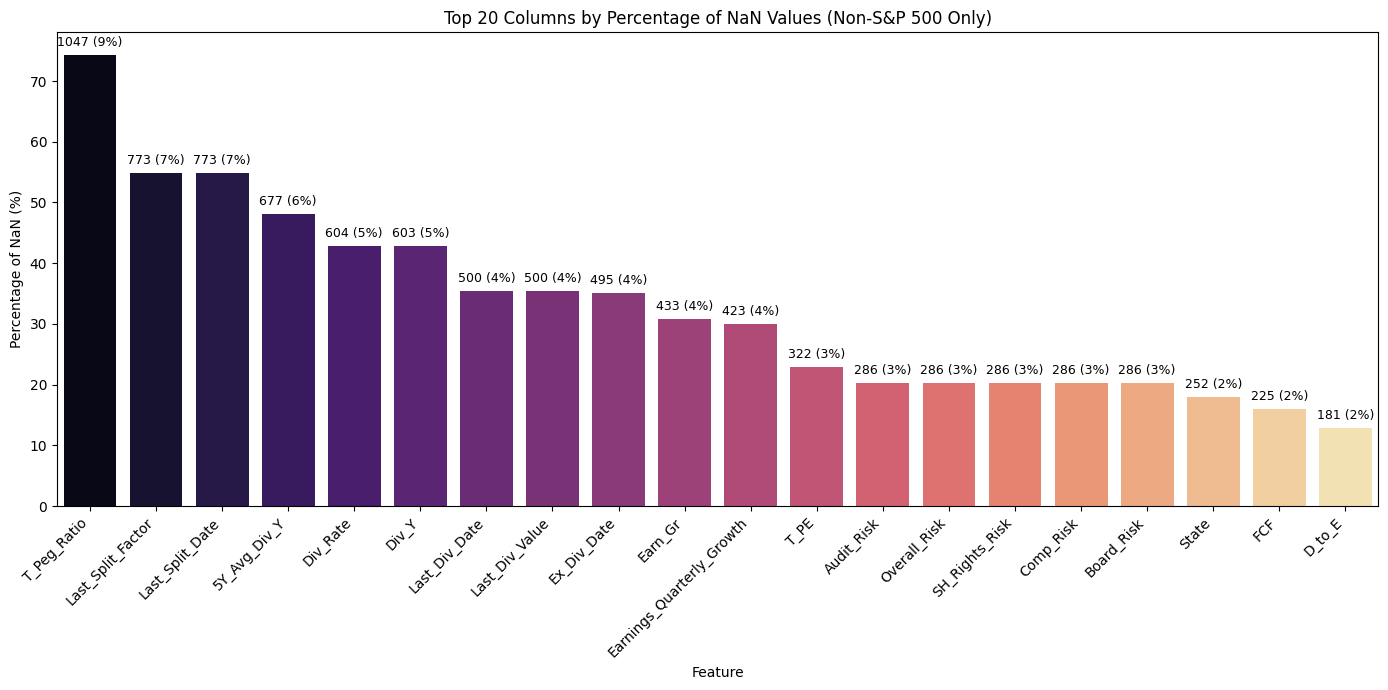

In [54]:
# Calculate average percentage of NaN values per column for S&P 500 only
sp500_only = merged_data[merged_data['SP500'] == 'S&P 500']
nan_counts_sp500 = sp500_only.isna().sum().reset_index()
nan_counts_sp500.columns = ['Feature', 'Num_NaN']
nan_counts_sp500['Pct_NaN'] = (nan_counts_sp500['Num_NaN'] / len(sp500_only)) * 100
nan_counts_sp500['Pct_of_Total_NaN'] = (nan_counts_sp500['Num_NaN'] / nan_counts_sp500['Num_NaN'].sum() * 100).round().astype(int)
nan_counts_sp500 = nan_counts_sp500[nan_counts_sp500['Num_NaN'] > 0]
nan_counts_sp500 = nan_counts_sp500.sort_values('Pct_NaN', ascending=False)

# Remove 'Change_5d' from the results if present
nan_counts_sp500 = nan_counts_sp500[nan_counts_sp500['Feature'] != 'Change_5d']

# Visualize the top 20 columns with the highest percentage of NaN values (S&P 500 only)
plt.figure(figsize=(14,7))
barplot = sns.barplot(
    data=nan_counts_sp500.head(20),
    x='Feature',
    y='Pct_NaN',
    palette='magma',
    hue='Feature',
    legend=False
)
plt.title('Top 20 Columns by Percentage of NaN Values (S&P 500 Only)')
plt.ylabel('Percentage of NaN (%)')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')

# Add count values and % of total NaN on top of each bar (integer %)
for i, row in nan_counts_sp500.head(20).reset_index().iterrows():
    barplot.text(
        i, 
        row['Pct_NaN'] + 1,  # slightly above the bar
        f"{int(row['Num_NaN'])} ({row['Pct_of_Total_NaN']}%)", 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='black'
    )

plt.tight_layout()
plt.show()

# Calculate average percentage of NaN values per column for non-S&P 500 stocks only
non_sp500 = merged_data[merged_data['SP500'] != 'S&P 500']
nan_counts_nonsp500 = non_sp500.isna().sum().reset_index()
nan_counts_nonsp500.columns = ['Feature', 'Num_NaN']
nan_counts_nonsp500['Pct_NaN'] = (nan_counts_nonsp500['Num_NaN'] / len(non_sp500)) * 100
nan_counts_nonsp500['Pct_of_Total_NaN'] = (nan_counts_nonsp500['Num_NaN'] / nan_counts_nonsp500['Num_NaN'].sum() * 100).round().astype(int)
nan_counts_nonsp500 = nan_counts_nonsp500[nan_counts_nonsp500['Num_NaN'] > 0]
nan_counts_nonsp500 = nan_counts_nonsp500.sort_values('Pct_NaN', ascending=False)

# Remove 'Change_5d' from the results if present
nan_counts_nonsp500 = nan_counts_nonsp500[nan_counts_nonsp500['Feature'] != 'Change_5d']

# Visualize the top 20 columns with the highest percentage of NaN values (non-S&P 500 only)
plt.figure(figsize=(14,7))
barplot2 = sns.barplot(
    data=nan_counts_nonsp500.head(20),
    x='Feature',
    y='Pct_NaN',
    palette='magma',
    hue='Feature',
    legend=False
)
plt.title('Top 20 Columns by Percentage of NaN Values (Non-S&P 500 Only)')
plt.ylabel('Percentage of NaN (%)')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')

# Add count values and % of total NaN on top of each bar (integer %)
for i, row in nan_counts_nonsp500.head(20).reset_index().iterrows():
    barplot2.text(
        i, 
        row['Pct_NaN'] + 1,  # slightly above the bar
        f"{int(row['Num_NaN'])} ({row['Pct_of_Total_NaN']}%)", 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='black'
    )

plt.tight_layout()
plt.show()



<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">3. Analysys by States of US Stock Market
</div>

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">3.1 Market Cap by US State
</div>


Darker shades indicate higher total market capitalization of companies headquartered in each state. Leading states are **California** (tech giants like Apple, NVIDIA), **New York** (finance hubs like JPMorgan), and **Texas** (energy/tech with Tesla, Exxon).  

**Market Cap** = Share Price × Total Shares – measures a company's public market value. Top states dominate due to concentrated corporate HQs in key sectors.  

In [ ]:
# Plot sum of Market Cap by US state on a geographic map (card)
import plotly.express as px

# Filter out rows with missing or non-US states
us_states = data['State'].dropna().unique()
# Remove any non-standard state entries (e.g., not 2-letter codes)
us_states = [s for s in us_states if isinstance(s, str) and len(s) == 2]

# Aggregate Market Cap by state
state_marketcap = (
    data[data['State'].isin(us_states)]
    .groupby('State', as_index=False)['Market_Cap']
    .sum()
)

# Plot using Plotly's choropleth for US states
fig = px.choropleth(
    state_marketcap,
    locations='State',
    locationmode='USA-states',
    color='Market_Cap',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'Market_Cap': 'Total Market Cap'},
    title='Market Cap by US State'
)


fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">3.2 EBITDA by US State
</div>

Darker shades indicate higher total EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization) for companies based in each state. Leading states are **California** (tech cash flows), **Texas** (energy profits), and **New York** (financial sector strength).  

**EBITDA** = Revenue - Expenses (excluding interest/taxes/depreciation) - measures operational profitability. Top states reflect industries with strong cash generation.  

In [9]:
# Plot sum of Market Cap by US state on a geographic map (card)
import plotly.express as px

# Filter out rows with missing or non-US states
us_states = data['State'].dropna().unique()
# Remove any non-standard state entries (e.g., not 2-letter codes)
us_states = [s for s in us_states if isinstance(s, str) and len(s) == 2]

# Aggregate Market Cap by state
state_marketcap = (
    data[data['State'].isin(us_states)]
    .groupby('State', as_index=False)['EBITDA']
    .sum()
)

# Plot using Plotly's choropleth for US states
fig = px.choropleth(
    state_marketcap,
    locations='State',
    locationmode='USA-states',
    color='EBITDA',
    color_continuous_scale='Oranges',  # changed to orange color scale
    scope='usa',
    labels={'EBITDA': 'Total Market Cap'},
    title='EBITDA by US State'
)


fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">3.3 Employees by State
</div>


Darker shades indicate higher total employee counts for companies headquartered in each state. Top states include **California** (tech/retail), **Texas** (energy/services), and **New York** (finance), with major employment hubs in **Florida, Georgia, Illinois, Ohio, Tennessee, North Carolina, Virginia**, and **Minnesota**.  

**Workforce Impact** = Total corporate employment per state. High-employment states often have strong manufacturing, healthcare, or logistics sectors (e.g., Amazon in TN, Delta in GA, Target in MN).  

In [10]:
# Plot sum of Employees (Empl_K) by US state on a larger geographic map (card)
import plotly.express as px

# Filter out rows with missing or non-US states
us_states = data['State'].dropna().unique()
us_states = [s for s in us_states if isinstance(s, str) and len(s) == 2]

# Aggregate Employees by state (Empl_K is in thousands, so multiply by 1000 for total employees)
state_employees = (
    data[data['State'].isin(us_states)]
    .groupby('State', as_index=False)['Empl_K']
    .sum()
)
state_employees['Total_Employees'] = state_employees['Empl_K'] * 1000

# Plot using Plotly's choropleth for US states with a larger figure size
fig = px.choropleth(
    state_employees,
    locations='State',
    locationmode='USA-states',
    color='Total_Employees',
    color_continuous_scale='Greens',
    scope='usa',
    labels={'Total_Employees': 'Total Employees'},
    title='Employees by US State',
)

# Make the map larger
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()



<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4. Top/Bottom 10 Industries</div>

The following 9 charts will analyze U.S. industries across critical financial dimensions, highlighting both the strongest and weakest performers in each category:

1. **YTD Price Change (%)**  
   Measures year-to-date stock performance, indicating investor sentiment and sector momentum.

2. **Quick Ratio (Acid Test)**  
   Assesses immediate liquidity by comparing cash + receivables to current liabilities (excluding inventory).

3. **Current Ratio**  
   Evaluates short-term financial health via current assets vs current liabilities (includes inventory).

4. **Average Trading Volume**  
   Shows liquidity depth, with higher volumes suggesting greater investor interest and easier entry/exit.

5. **Average Beta Coefficient**  
   Quantifies market-relative volatility (β>1 = more volatile than market; β<1 = more stable).

6. **Net Debt/EBITDA**  
   Leverage metric where higher ratios suggest greater debt burdens relative to earnings power.

7. **Average Free Cash Flow (FCF)**  
   Reveals discretionary cash after operations and capital expenditures - crucial for growth/debt paydown.

8. **Average Operating Cash Flow (OCF)**  
   Measures core cash generation efficiency before financing/investment decisions.

9. **Market Capitalization**  
   Total equity value of industry constituents, showing economic scale and investor confidence.

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.1 Industries Year to Day</div>

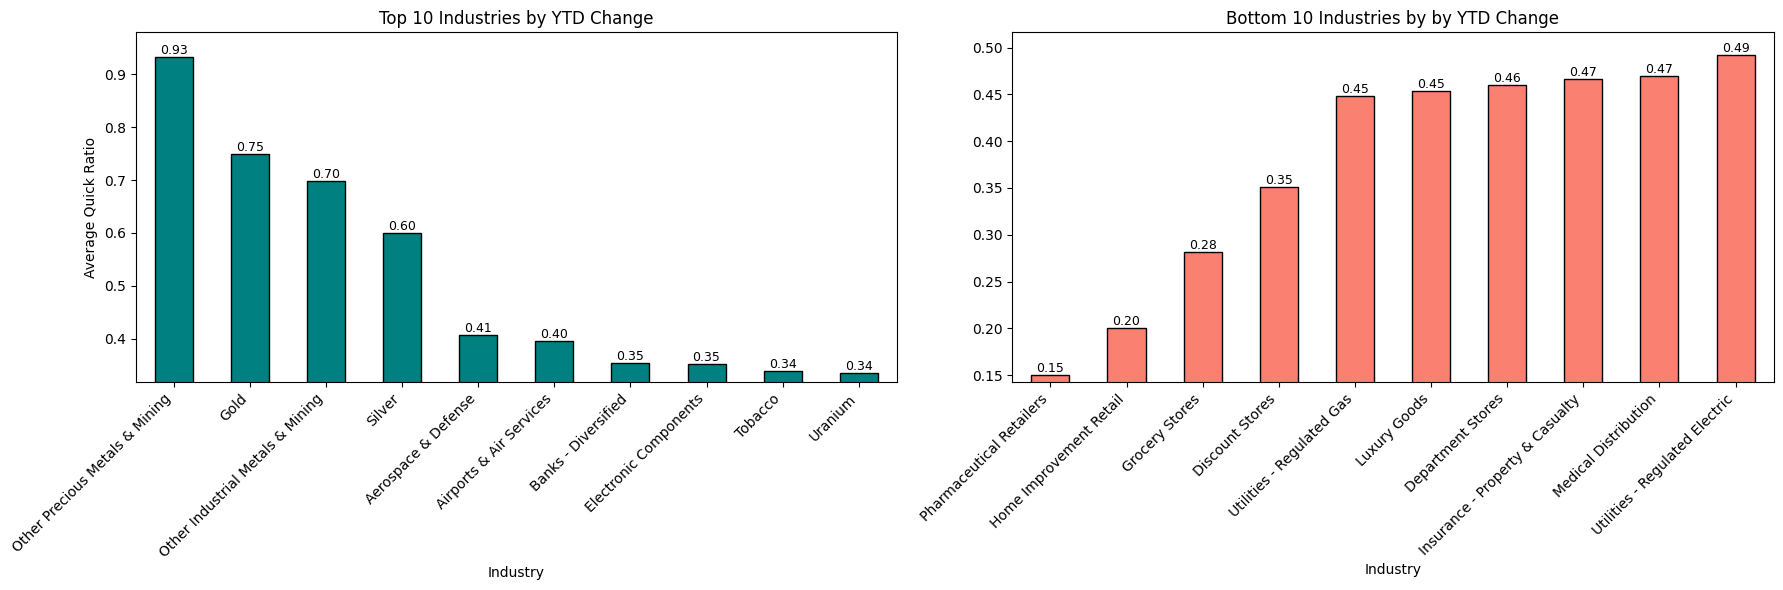

In [40]:
top10_industries_quick = (
    merged_data.groupby('Industry')['YTD Change']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average Quick Ratio
bottom10_industries_quick = (
    merged_data.groupby('Industry')['Quick_Ratio']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_quick.plot(kind='bar', color='teal', edgecolor='k', ax=axes[0])
axes[0].set_ylabel('Average Quick Ratio')
axes[0].set_title('Top 10 Industries by YTD Change')
axes[0].set_xticklabels(top10_industries_quick.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_quick.min() * 0.95, top10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_quick.plot(kind='bar', color='salmon', edgecolor='k', ax=axes[1])
axes[1].set_title('Bottom 10 Industries by by YTD Change')
axes[1].set_xticklabels(bottom10_industries_quick.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_quick.min() * 0.95, bottom10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.2 Quick Ratio</div>

**Quick Ratio** (also called the **Acid-Test Ratio**) measures a company's ability to meet its short-term obligations using its most liquid assets. It's a more conservative liquidity measure than the Current Ratio as it excludes inventory.

Quick Ratio = (Cash & Equivalents + Marketable Securities + Accounts Receivable) / Current Liabilities



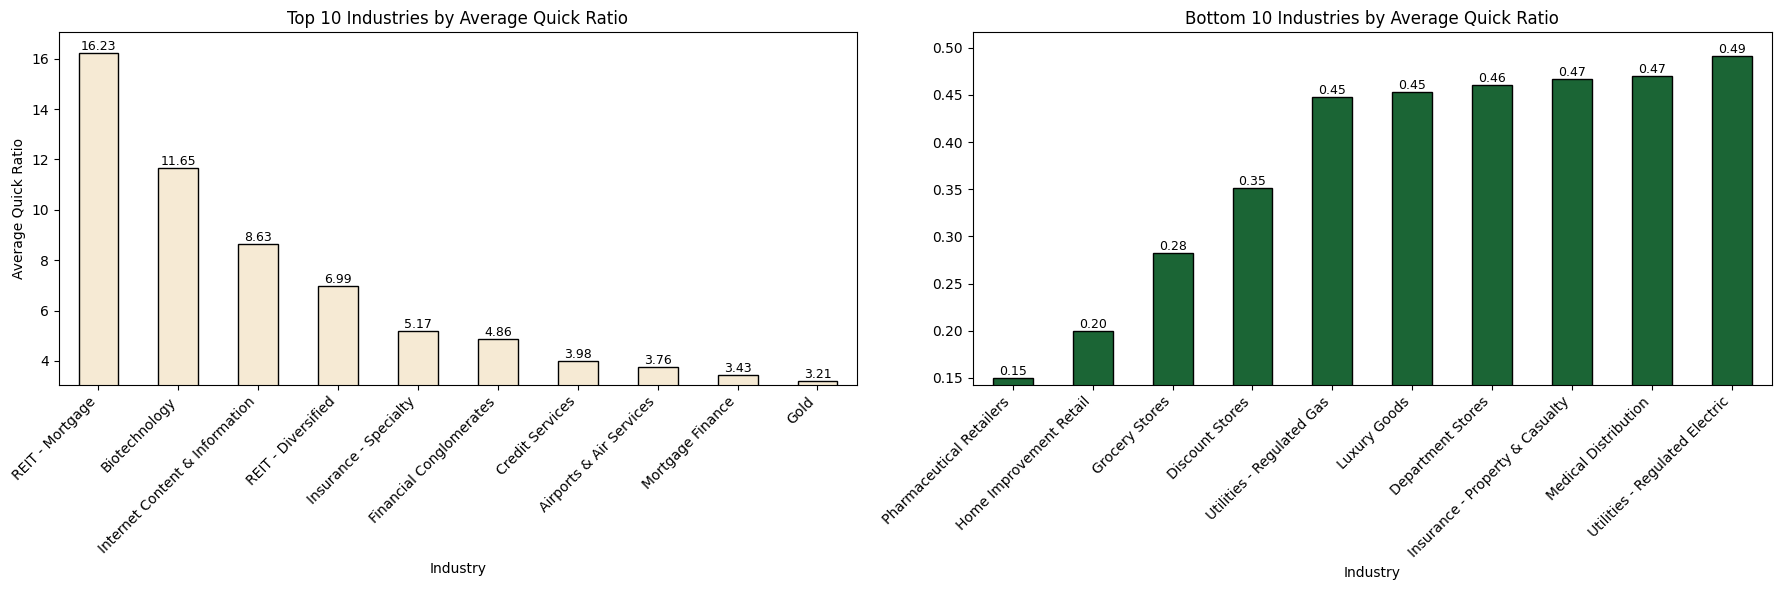

In [42]:
# Top 10 industries by average Quick Ratio
top10_industries_quick = (
    data.groupby('Industry')['Quick_Ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average Quick Ratio
bottom10_industries_quick = (
    data.groupby('Industry')['Quick_Ratio']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_quick.plot(kind='bar', color='#f6ead4', edgecolor='k', ax=axes[0])
axes[0].set_ylabel('Average Quick Ratio')
axes[0].set_title('Top 10 Industries by Average Quick Ratio')
axes[0].set_xticklabels(top10_industries_quick.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_quick.min() * 0.95, top10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_quick.plot(kind='bar', color='#1b6535', edgecolor='k', ax=axes[1])
axes[1].set_title('Bottom 10 Industries by Average Quick Ratio')
axes[1].set_xticklabels(bottom10_industries_quick.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_quick.min() * 0.95, bottom10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.3 Current Ratio</div>

**Current Ratio** measures a company's ability to pay its short-term obligations (due within one year) using its current assets. It's a fundamental liquidity metric that indicates financial health.

Current Ratio = Current Assets / Current Liabilities



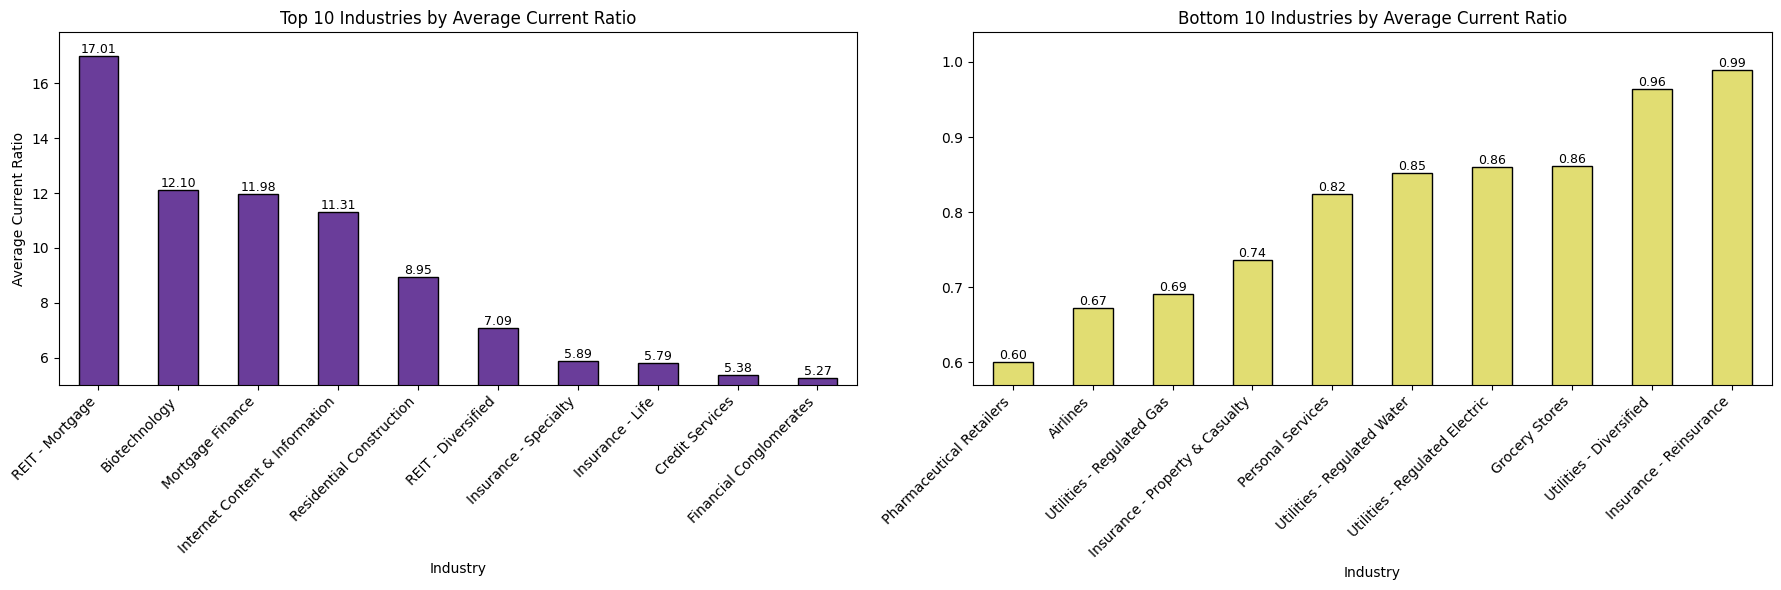

In [43]:
# Top 10 industries by average Current Ratio
top10_industries_current = (
    data.groupby('Industry')['Current_Ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average Current Ratio
bottom10_industries_current = (
    data.groupby('Industry')['Current_Ratio']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_current.plot(
    kind='bar', 
    color='#6a3d9a',  # purple
    edgecolor='k', 
    ax=axes[0]
)
axes[0].set_ylabel('Average Current Ratio')
axes[0].set_title('Top 10 Industries by Average Current Ratio')
axes[0].set_xticklabels(top10_industries_current.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_current.min() * 0.95, top10_industries_current.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_current.plot(
    kind='bar', 
    color='#e1dd72',  # green
    edgecolor='k', 
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Industries by Average Current Ratio')
axes[1].set_xticklabels(bottom10_industries_current.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_current.min() * 0.95, bottom10_industries_current.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.4 Average Volume</div>

**Trading Volume** measures the total number of shares or contracts traded for a security during a given period. It's a key liquidity metric that reflects the level of market activity and investor interest.



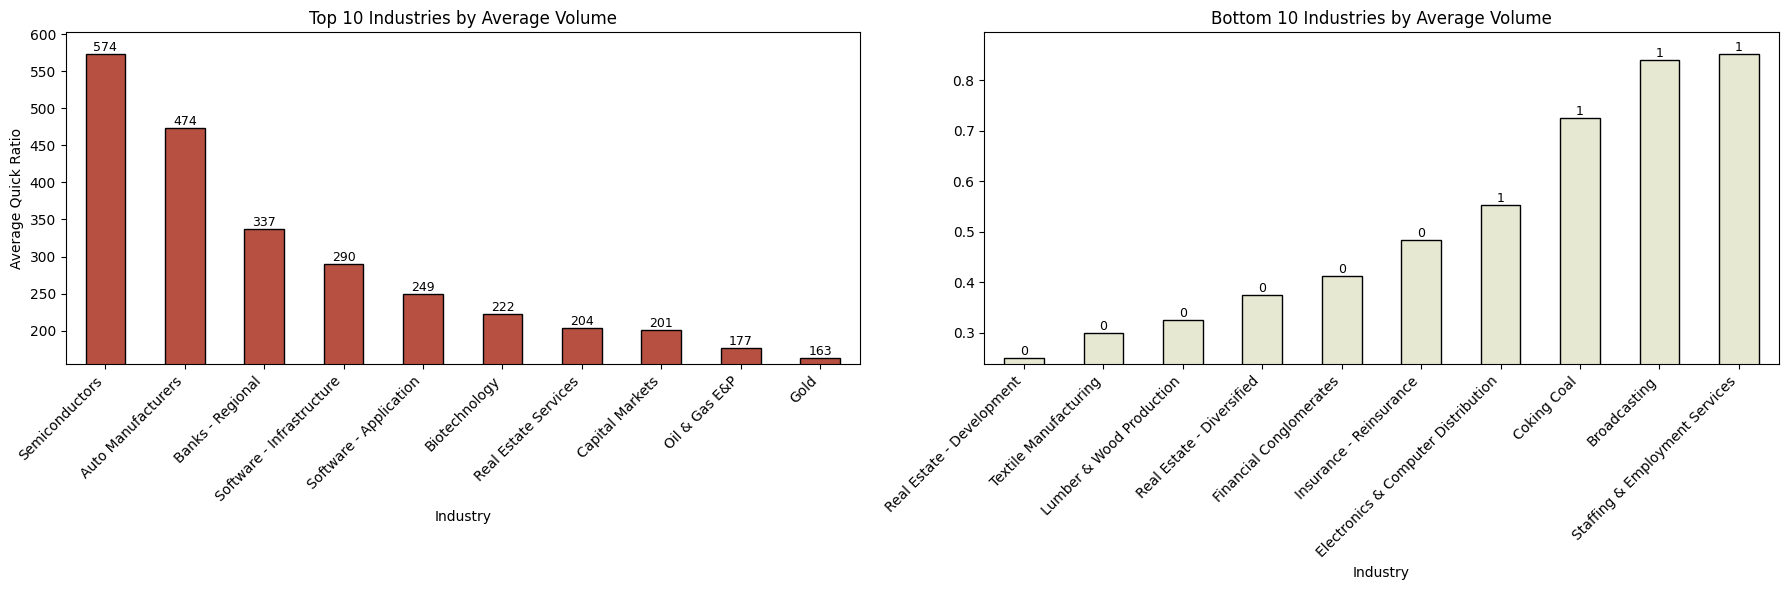

In [44]:
# Top 10 industries by total Volume
top10_industries_quick = (
    data.groupby('Industry')['Avg_Vol']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average Volume, removing those with empty (NaN or 0) volumes
industry_avg_vol = data.groupby('Industry')['Avg_Vol'].mean()
industry_avg_vol = industry_avg_vol.dropna()
industry_avg_vol = industry_avg_vol[industry_avg_vol > 0]
bottom10_industries_quick = (
    industry_avg_vol
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_quick.plot(kind='bar', color='#b85042', edgecolor='k', ax=axes[0])
axes[0].set_ylabel('Average Quick Ratio')
axes[0].set_title('Top 10 Industries by Average Volume')
axes[0].set_xticklabels(top10_industries_quick.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_quick.min() * 0.95, top10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:,.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_quick.plot(kind='bar', color='#e7e8d1', edgecolor='k', ax=axes[1])
axes[1].set_title('Bottom 10 Industries by Average Volume')
axes[1].set_xticklabels(bottom10_industries_quick.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_quick.min() * 0.95, bottom10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:,.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.5 Average Beta</div>

**Beta (β)** measures a stock's volatility relative to the overall market. It quantifies systematic risk - the risk inherent to the entire market that cannot be diversified away.


β = Covariance(Stock Returns, Market Returns) ÷ Variance(Market Returns)



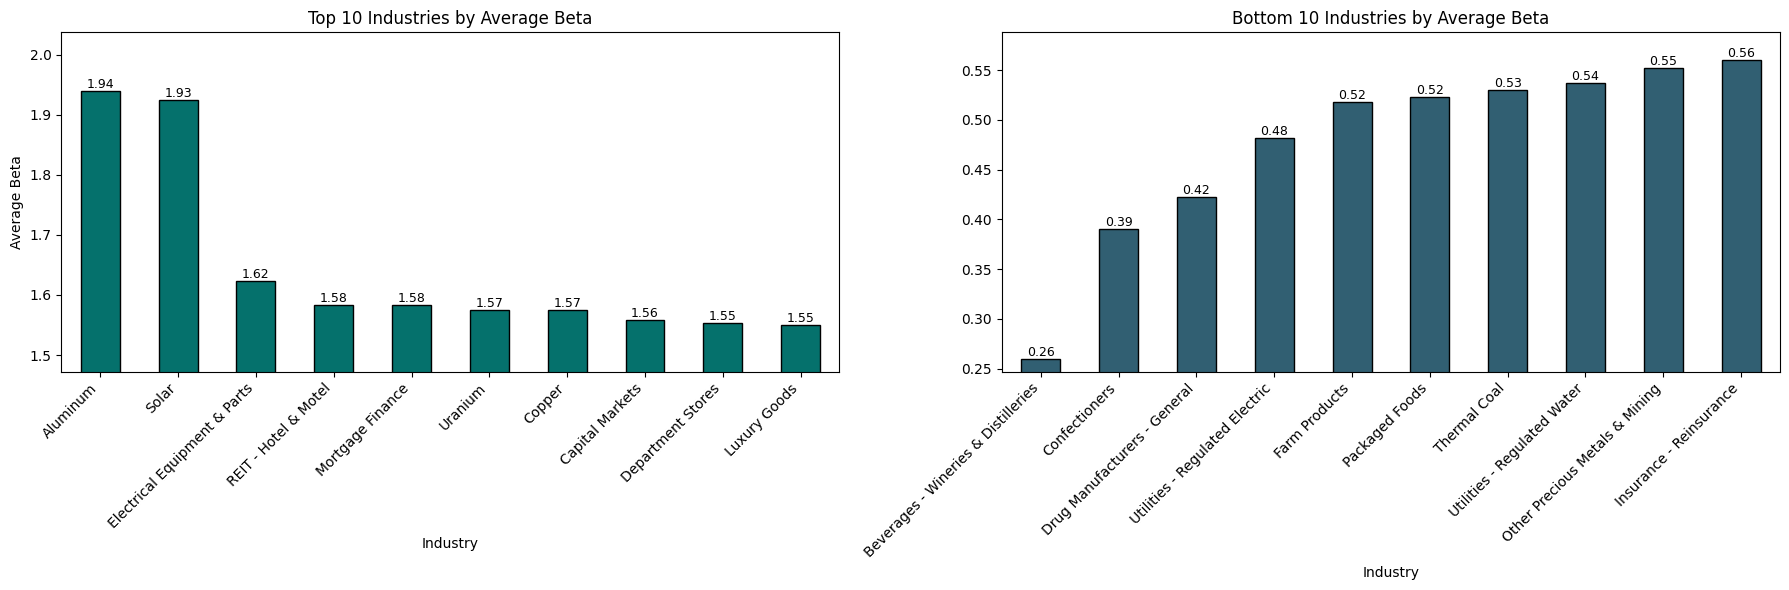

In [45]:
# Top 10 industries by average Beta
top10_industries_beta = (
    data.groupby('Industry')['Beta']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average Beta
bottom10_industries_beta = (
    data.groupby('Industry')['Beta']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_beta.plot(kind='bar', color='#05716c', edgecolor='k', ax=axes[0])
axes[0].set_ylabel('Average Beta')
axes[0].set_title('Top 10 Industries by Average Beta')
axes[0].set_xticklabels(top10_industries_beta.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_beta.min() * 0.95, top10_industries_beta.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_beta.plot(kind='bar', color='#315f72', edgecolor='k', ax=axes[1])
axes[1].set_title('Bottom 10 Industries by Average Beta')
axes[1].set_xticklabels(bottom10_industries_beta.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_beta.min() * 0.95, bottom10_industries_beta.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.6 Average Net Financial Debt to EBITDA</div>

**Net Financial Debt (NFD)** measures a company's overall debt position by subtracting its liquid assets from its financial obligations. It shows how much debt would remain if the company used all its cash and cash equivalents to pay down debt.

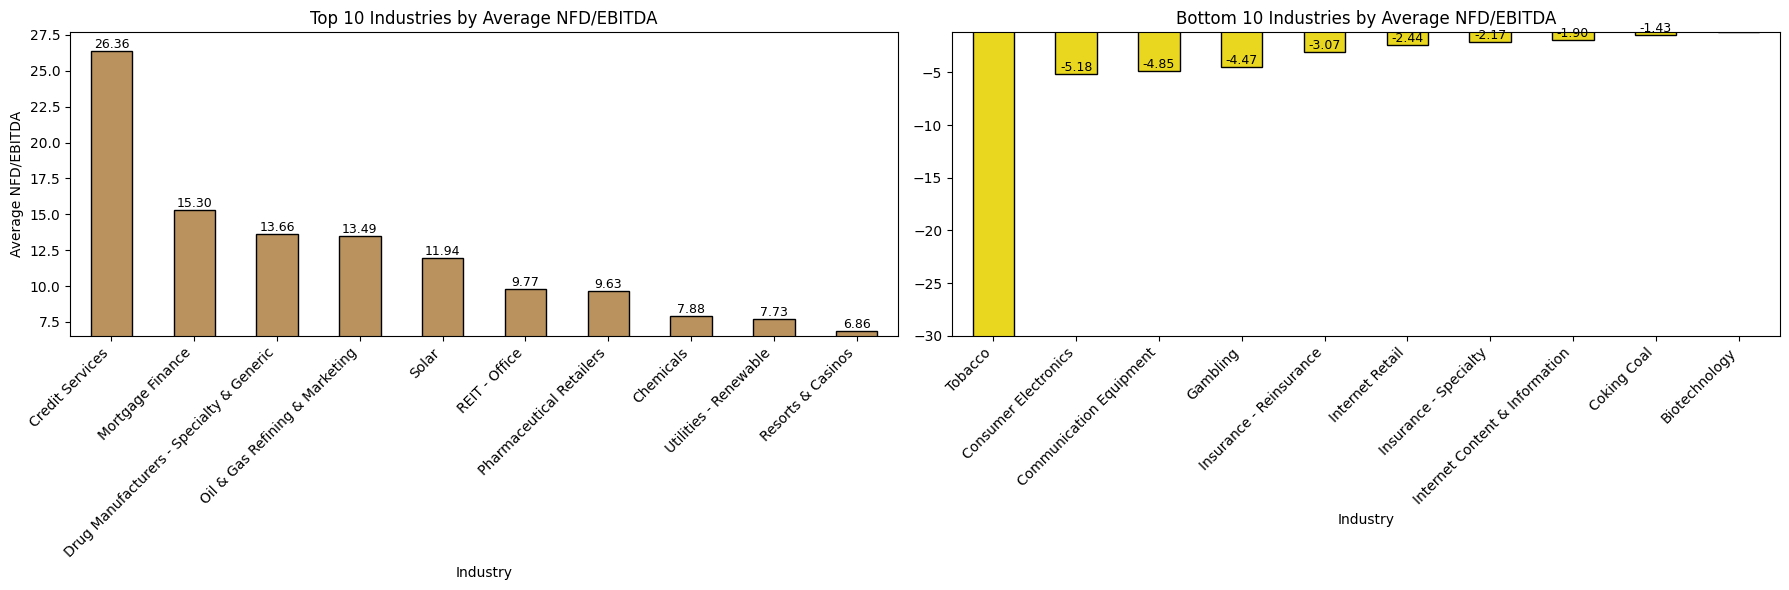

In [46]:
# Top 10 industries by average NFD/EBITDA
top10_industries_quick = (
    data.groupby('Industry')['ND_to_EBITDA']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average NFD/EBITDA
bottom10_industries_quick = (
    data.groupby('Industry')['ND_to_EBITDA']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_quick.plot(kind='bar', color='#b9925e', edgecolor='k', ax=axes[0])
axes[0].set_ylabel('Average NFD/EBITDA')
axes[0].set_title('Top 10 Industries by Average NFD/EBITDA')
axes[0].set_xticklabels(top10_industries_quick.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_quick.min() * 0.95, top10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_quick.plot(kind='bar', color='#e8d71e', edgecolor='k', ax=axes[1])
axes[1].set_title('Bottom 10 Industries by Average NFD/EBITDA')
axes[1].set_xticklabels(bottom10_industries_quick.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_quick.min() * 0.95, bottom10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.7 Average Free Cash Flow</div>

**Free Cash Flow (FCF)** is the cash a company generates after accounting for cash outflows to support operations and maintain capital assets. It represents the cash available for:
- Debt repayment
- Dividends
- Share buybacks
- Reinvestment in the business

FCF = Operating Cash Flow (OCF) - Capital Expenditures (CapEx)

FCF = Net Income + Depreciation/Amortization - Change in Working Capital - CapEx



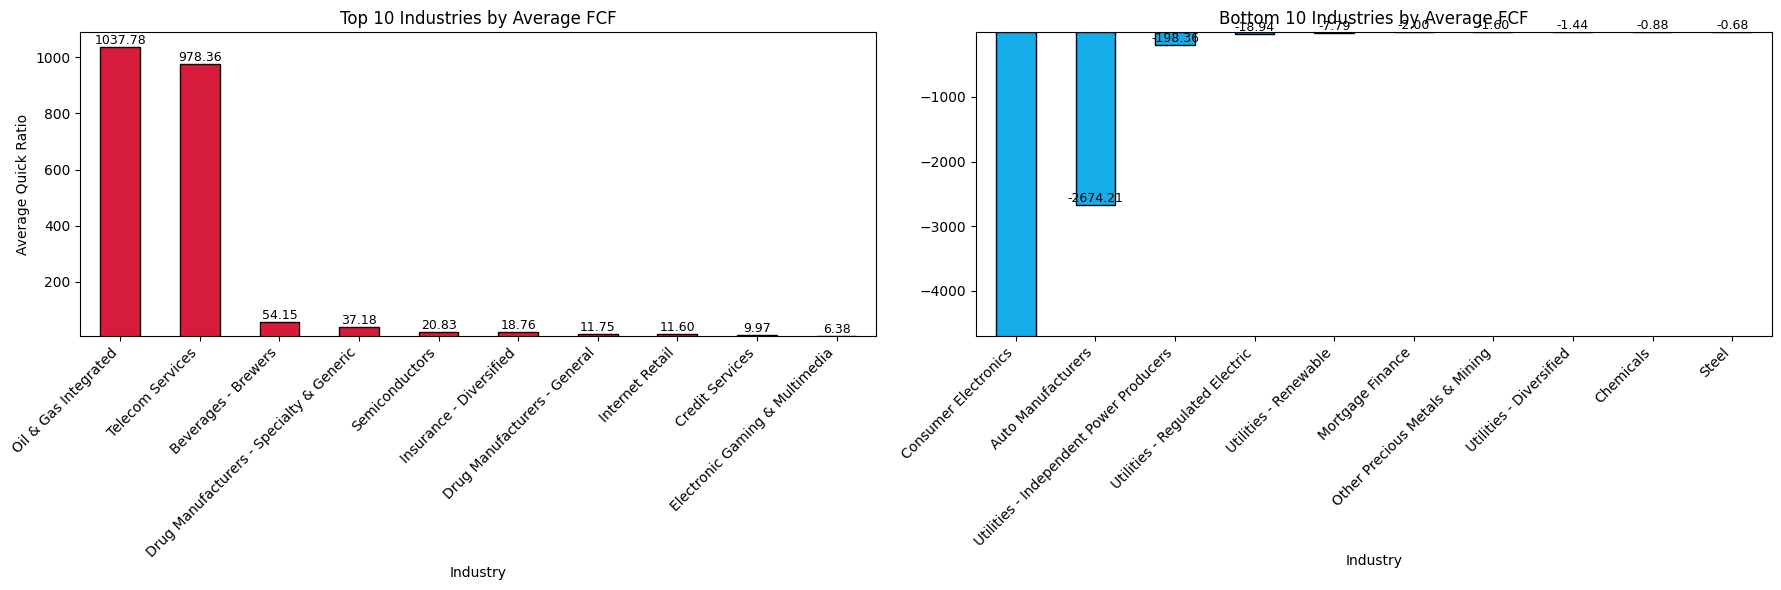

In [47]:
# Top 10 industries by average Quick Ratio
top10_industries_quick = (
    data.groupby('Industry')['FCF']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average Quick Ratio
bottom10_industries_quick = (
    data.groupby('Industry')['FCF']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_quick.plot(kind='bar', color='#d71b3b', edgecolor='k', ax=axes[0])
axes[0].set_ylabel('Average Quick Ratio')
axes[0].set_title('Top 10 Industries by Average FCF')
axes[0].set_xticklabels(top10_industries_quick.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_quick.min() * 0.95, top10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_quick.plot(kind='bar', color='#16acea', edgecolor='k', ax=axes[1])
axes[1].set_title('Bottom 10 Industries by Average FCF')
axes[1].set_xticklabels(bottom10_industries_quick.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_quick.min() * 0.95, bottom10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.8 Average Operation Cash Flow</div>

**Operating Cash Flow (OCF)**, also called **Cash Flow from Operations (CFO)**, measures the cash generated or consumed by a company's core business operations. It reflects how efficiently a company turns revenue into cash. 
 
OCF = Cash Receipts from Customers - Cash Payments to Suppliers & Employees - Cash Paid for Operating Expenses

OCF = Net Income + Non-Cash Expenses (Depreciation/Amortization) ± Changes in Working Capital



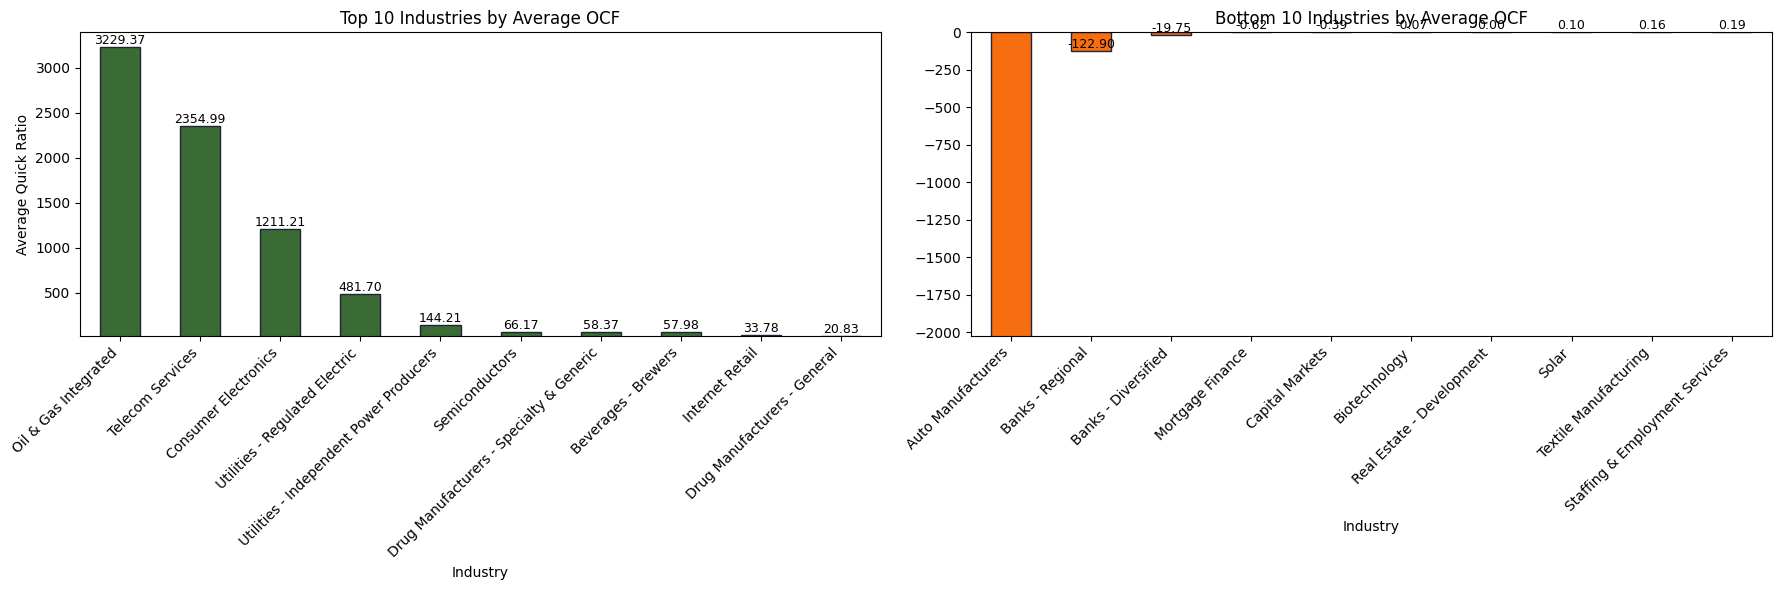

In [48]:
# Top 10 industries by average Quick Ratio
top10_industries_quick = (
    data.groupby('Industry')['OCF']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by average Quick Ratio
bottom10_industries_quick = (
    data.groupby('Industry')['OCF']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_quick.plot(kind='bar', color='#3a6b35', edgecolor='#22223B', ax=axes[0])  # blue with dark edge
axes[0].set_ylabel('Average Quick Ratio')
axes[0].set_title('Top 10 Industries by Average OCF')
axes[0].set_xticklabels(top10_industries_quick.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_quick.min() * 0.95, top10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_quick.plot(kind='bar', color='#F76E11', edgecolor='#22223B', ax=axes[1])  # orange with dark edge
axes[1].set_title('Bottom 10 Industries by Average OCF')
axes[1].set_xticklabels(bottom10_industries_quick.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_quick.min() * 0.95, bottom10_industries_quick.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.9 Industries by Market Capitalization</div>

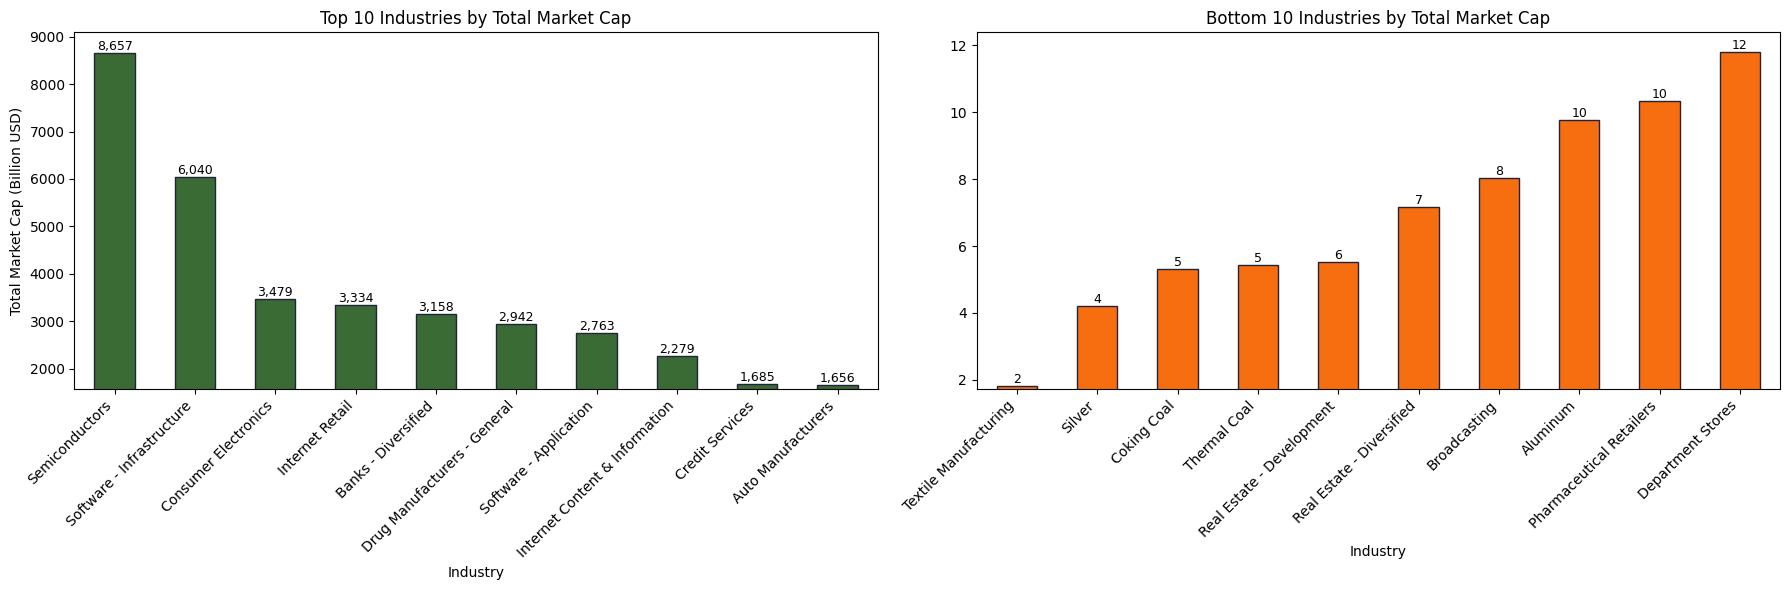

In [49]:
# Top 10 industries by total Market Cap
top10_industries_marketcap = (
    data.groupby('Industry')['Market_Cap']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Bottom 10 industries by total Market Cap
bottom10_industries_marketcap = (
    data.groupby('Industry')['Market_Cap']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

# Side-by-side bar plots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
bars1 = top10_industries_marketcap.plot(kind='bar', color='#3a6b35', edgecolor='#22223B', ax=axes[0])
axes[0].set_ylabel('Total Market Cap (Billion USD)')
axes[0].set_title('Top 10 Industries by Total Market Cap')
axes[0].set_xticklabels(top10_industries_marketcap.index, rotation=45, ha='right')
axes[0].set_ylim(top10_industries_marketcap.min() * 0.95, top10_industries_marketcap.max() * 1.05)
# Add values to bars
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:,.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

# Bottom 10
bars2 = bottom10_industries_marketcap.plot(kind='bar', color='#F76E11', edgecolor='#22223B', ax=axes[1])
axes[1].set_title('Bottom 10 Industries by Total Market Cap')
axes[1].set_xticklabels(bottom10_industries_marketcap.index, rotation=45, ha='right')
axes[1].set_ylim(bottom10_industries_marketcap.min() * 0.95, bottom10_industries_marketcap.max() * 1.05)
# Add values to bars
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:,.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">4.1 Growth Revenue vs Earnings Revenue

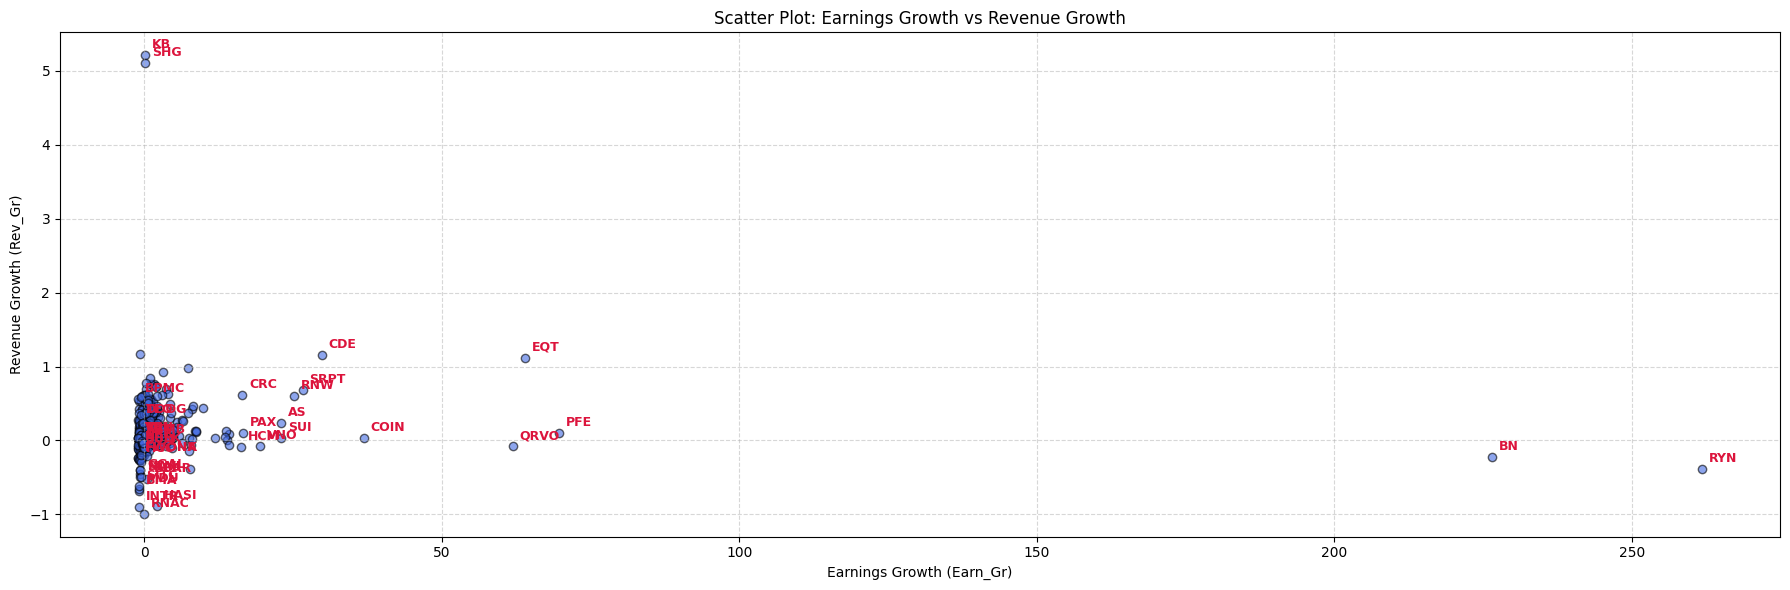

In [20]:
# Scatter plot comparing Earnings Growth (Earn_Gr) with Revenue Growth (Rev_Gr)
plt.figure(figsize=(18, 6))
plt.scatter(data['Earn_Gr'], data['Rev_Gr'], alpha=0.6, c='royalblue', edgecolor='k')

plt.xlabel('Earnings Growth (Earn_Gr)')
plt.ylabel('Revenue Growth (Rev_Gr)')
plt.title('Scatter Plot: Earnings Growth vs Revenue Growth')
plt.grid(True, linestyle='--', alpha=0.5)

# Identify outliers: e.g., points where either Earn_Gr or Rev_Gr is in the top/bottom 1%
earn_gr = data['Earn_Gr']
rev_gr = data['Rev_Gr']

# Calculate thresholds for outliers (top/bottom 1%)
earn_gr_low, earn_gr_high = earn_gr.quantile([0.01, 0.99])
rev_gr_low, rev_gr_high = rev_gr.quantile([0.01, 0.99])

# Boolean mask for outliers
outlier_mask = (
    (earn_gr <= earn_gr_low) | (earn_gr >= earn_gr_high) |
    (rev_gr <= rev_gr_low) | (rev_gr >= rev_gr_high)
)

# Annotate outliers with their symbol names
for idx, row in data[outlier_mask].iterrows():
    plt.annotate(
        row['Symbol'],
        (row['Earn_Gr'], row['Rev_Gr']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='crimson',
        weight='bold'
    )

plt.tight_layout()
plt.show()



<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">5. Distributions
</div>

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">5.1 Distribution of Number of Analysts
</div>

Indicates how many professional analysts (typically from investment banks, brokerages, or research firms) actively publish valuations and recommendations for a stock.  

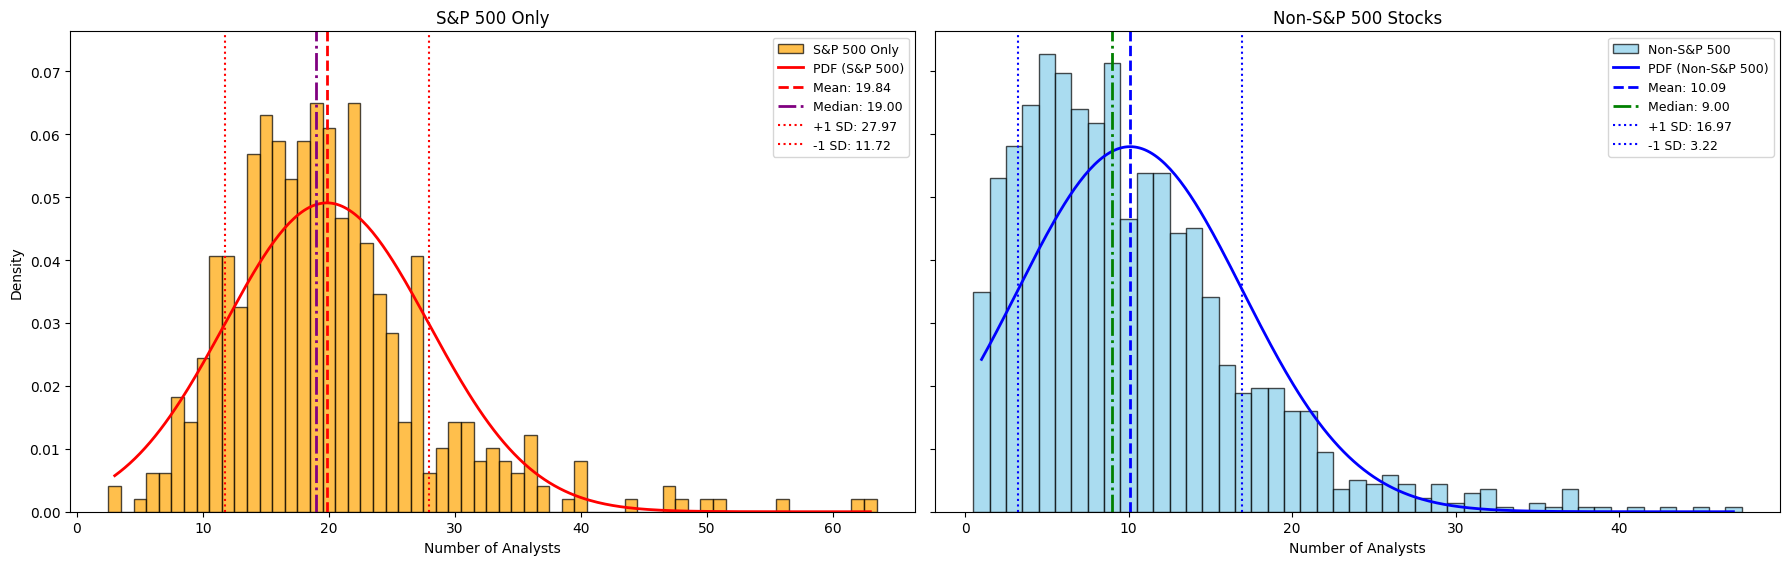

In [21]:
# Histogram of number of Analysts (Anlsts) for S&P 500 only and non-S&P 500 stocks, with PDF, mean, median, and standard deviation, as two subplots on one line

import numpy as np
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(18,6), sharey=True)

# --- S&P 500 only (now on the left) ---
sp500_data = data[data['SP500'] == 'S&P 500']
anlsts_sp500 = sp500_data['Anlsts'].dropna()
mean_sp500 = anlsts_sp500.mean()
median_sp500 = anlsts_sp500.median()
std_sp500 = anlsts_sp500.std()
bins_sp500 = np.arange(anlsts_sp500.min(), anlsts_sp500.max() + 2) - 0.5

ax = axes[0]
ax.hist(anlsts_sp500, bins=bins_sp500, color='orange', edgecolor='black', alpha=0.7, density=True, label='S&P 500 Only')
x_sp500 = np.linspace(anlsts_sp500.min(), anlsts_sp500.max(), 300)
pdf_sp500 = norm.pdf(x_sp500, mean_sp500, std_sp500)
ax.plot(x_sp500, pdf_sp500, 'r-', lw=2, label='PDF (S&P 500)')
ax.axvline(mean_sp500, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_sp500:.2f}')
ax.axvline(median_sp500, color='purple', linestyle='-.', linewidth=2, label=f'Median: {median_sp500:.2f}')
ax.axvline(mean_sp500+std_sp500, color='red', linestyle=':', linewidth=1.5, label=f'+1 SD: {mean_sp500+std_sp500:.2f}')
ax.axvline(mean_sp500-std_sp500, color='red', linestyle=':', linewidth=1.5, label=f'-1 SD: {mean_sp500-std_sp500:.2f}')
ax.set_xlabel('Number of Analysts')
ax.set_ylabel('Density')
ax.set_title('S&P 500 Only')
ax.legend(fontsize=9)

# --- Non-S&P 500 stocks (now on the right) ---
non_sp500_data = data[data['SP500'] != 'S&P 500']
anlsts_non_sp500 = non_sp500_data['Anlsts'].dropna()
mean_non_sp500 = anlsts_non_sp500.mean()
median_non_sp500 = anlsts_non_sp500.median()
std_non_sp500 = anlsts_non_sp500.std()
bins_non_sp500 = np.arange(anlsts_non_sp500.min(), anlsts_non_sp500.max() + 2) - 0.5

ax = axes[1]
ax.hist(anlsts_non_sp500, bins=bins_non_sp500, color='skyblue', edgecolor='black', alpha=0.7, density=True, label='Non-S&P 500')
x_non_sp500 = np.linspace(anlsts_non_sp500.min(), anlsts_non_sp500.max(), 300)
pdf_non_sp500 = norm.pdf(x_non_sp500, mean_non_sp500, std_non_sp500)
ax.plot(x_non_sp500, pdf_non_sp500, 'b-', lw=2, label='PDF (Non-S&P 500)')
ax.axvline(mean_non_sp500, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_non_sp500:.2f}')
ax.axvline(median_non_sp500, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_non_sp500:.2f}')
ax.axvline(mean_non_sp500+std_non_sp500, color='blue', linestyle=':', linewidth=1.5, label=f'+1 SD: {mean_non_sp500+std_non_sp500:.2f}')
ax.axvline(mean_non_sp500-std_non_sp500, color='blue', linestyle=':', linewidth=1.5, label=f'-1 SD: {mean_non_sp500-std_non_sp500:.2f}')
ax.set_xlabel('Number of Analysts')
ax.set_title('Non-S&P 500 Stocks')
ax.legend(fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">5.2 Distribution of Beta
</div>

Measures a stock's volatility relative to the overall market (usually S&P 500).  

**Key Interpretation**:  
- β = **1.0**: Moves with the market (average risk)  
- β > **1.0**: More volatile than market (e.g., tech stocks often ~1.3-1.6)  
- β < **1.0**: Less volatile than market (e.g., utilities often ~0.7-0.9)  
- β = **0**: No correlation (theoretically)  
- β < **0**: Inverse correlation (rare)  

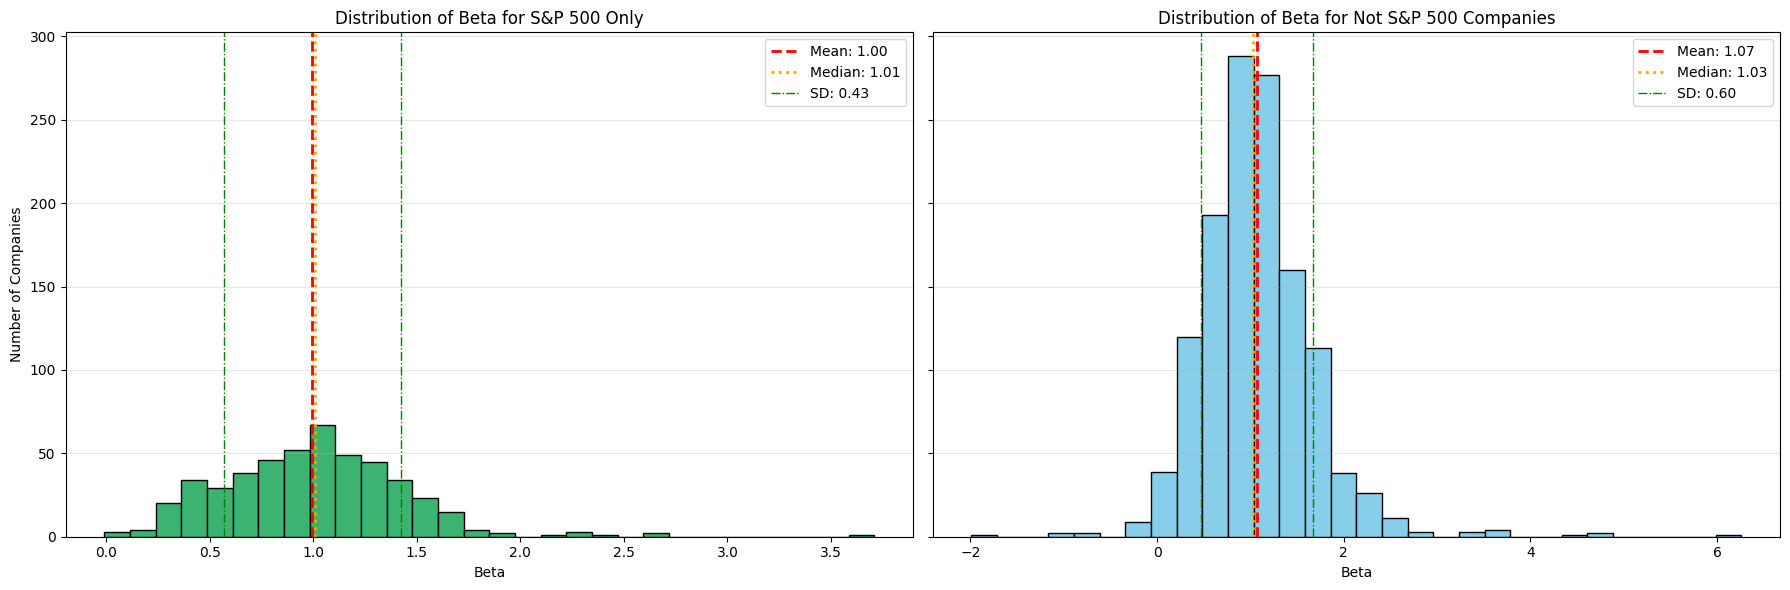

In [22]:
# Distribution (histogram) of Beta: S&P 500 Only vs Not S&P 500 Companies (side by side, S&P 500 on the left now)
# Also show mean, median, and standard deviation for each

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# S&P 500 only (now on the left)
sp500_data = data[data['SP500'] == 'S&P 500']
beta_sp500 = sp500_data['Beta'].dropna()
mean_sp = beta_sp500.mean()
median_sp = beta_sp500.median()
std_sp = beta_sp500.std()

axes[0].hist(beta_sp500, bins=30, color='mediumseagreen', edgecolor='black')
axes[0].axvline(mean_sp, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_sp:.2f}")
axes[0].axvline(median_sp, color='orange', linestyle='dotted', linewidth=2, label=f"Median: {median_sp:.2f}")
axes[0].axvline(mean_sp + std_sp, color='green', linestyle='dashdot', linewidth=1, label=f"SD: {std_sp:.2f}")
axes[0].axvline(mean_sp - std_sp, color='green', linestyle='dashdot', linewidth=1)
axes[0].set_xlabel('Beta')
axes[0].set_ylabel('Number of Companies')
axes[0].set_title('Distribution of Beta for S&P 500 Only')
axes[0].grid(axis='y', alpha=0.3)
axes[0].legend()

# Not S&P 500 companies (now on the right)
not_sp500_data = data[data['SP500'] != 'S&P 500']
beta_not_sp500 = not_sp500_data['Beta'].dropna()
mean_not_sp500 = beta_not_sp500.mean()
median_not_sp500 = beta_not_sp500.median()
std_not_sp500 = beta_not_sp500.std()

axes[1].hist(beta_not_sp500, bins=30, color='skyblue', edgecolor='black')
axes[1].axvline(mean_not_sp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_not_sp500:.2f}")
axes[1].axvline(median_not_sp500, color='orange', linestyle='dotted', linewidth=2, label=f"Median: {median_not_sp500:.2f}")
axes[1].axvline(mean_not_sp500 + std_not_sp500, color='green', linestyle='dashdot', linewidth=1, label=f"SD: {std_not_sp500:.2f}")
axes[1].axvline(mean_not_sp500 - std_not_sp500, color='green', linestyle='dashdot', linewidth=1)
axes[1].set_xlabel('Beta')
axes[1].set_title('Distribution of Beta for Not S&P 500 Companies')
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">5.3 Distribution of Dividends
</div>

Regular cash payments distributed to shareholders from a company's profits.  


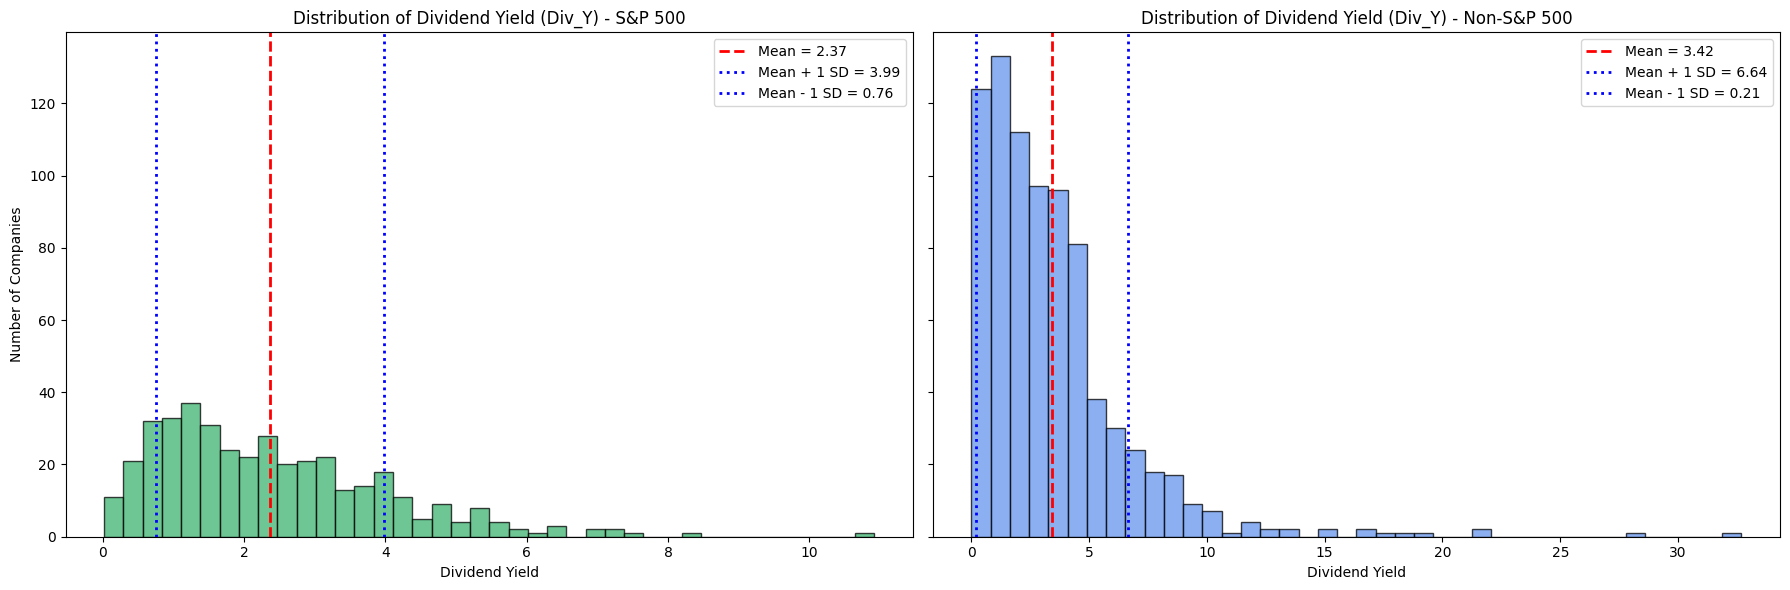

In [23]:
# Distribution of Dividend Yield (Div_Y) for S&P 500 and non-S&P 500 companies, with mean and SD
import matplotlib.pyplot as plt
import numpy as np

# S&P 500
sp500_div_y = data[(data['SP500'] == 'S&P 500') & (data['Div_Y'].notna())]['Div_Y']
mean_div_y_sp500 = sp500_div_y.mean()
std_div_y_sp500 = sp500_div_y.std()

# Non-S&P 500
nonsp500_div_y = data[(data['SP500'] != 'S&P 500') & (data['Div_Y'].notna())]['Div_Y']
mean_div_y_nonsp500 = nonsp500_div_y.mean()
std_div_y_nonsp500 = nonsp500_div_y.std()

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# S&P 500 plot
n1, bins1, patches1 = axes[0].hist(
    sp500_div_y,
    bins=40,
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.75
)
axes[0].axvline(mean_div_y_sp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_div_y_sp500:.2f}")
axes[0].axvline(mean_div_y_sp500 + std_div_y_sp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean + 1 SD = {mean_div_y_sp500 + std_div_y_sp500:.2f}")
axes[0].axvline(mean_div_y_sp500 - std_div_y_sp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean - 1 SD = {mean_div_y_sp500 - std_div_y_sp500:.2f}")
axes[0].set_xlabel('Dividend Yield')
axes[0].set_ylabel('Number of Companies')
axes[0].set_title('Distribution of Dividend Yield (Div_Y) - S&P 500')
axes[0].legend()

# Non-S&P 500 plot
n2, bins2, patches2 = axes[1].hist(
    nonsp500_div_y,
    bins=40,
    color='cornflowerblue',
    edgecolor='black',
    alpha=0.75
)
axes[1].axvline(mean_div_y_nonsp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_div_y_nonsp500:.2f}")
axes[1].axvline(mean_div_y_nonsp500 + std_div_y_nonsp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean + 1 SD = {mean_div_y_nonsp500 + std_div_y_nonsp500:.2f}")
axes[1].axvline(mean_div_y_nonsp500 - std_div_y_nonsp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean - 1 SD = {mean_div_y_nonsp500 - std_div_y_nonsp500:.2f}")
axes[1].set_xlabel('Dividend Yield')
axes[1].set_title('Distribution of Dividend Yield (Div_Y) - Non-S&P 500')
axes[1].legend()

plt.tight_layout()
plt.show()




<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">5.4 Distribution of 52 Week Change
</div>

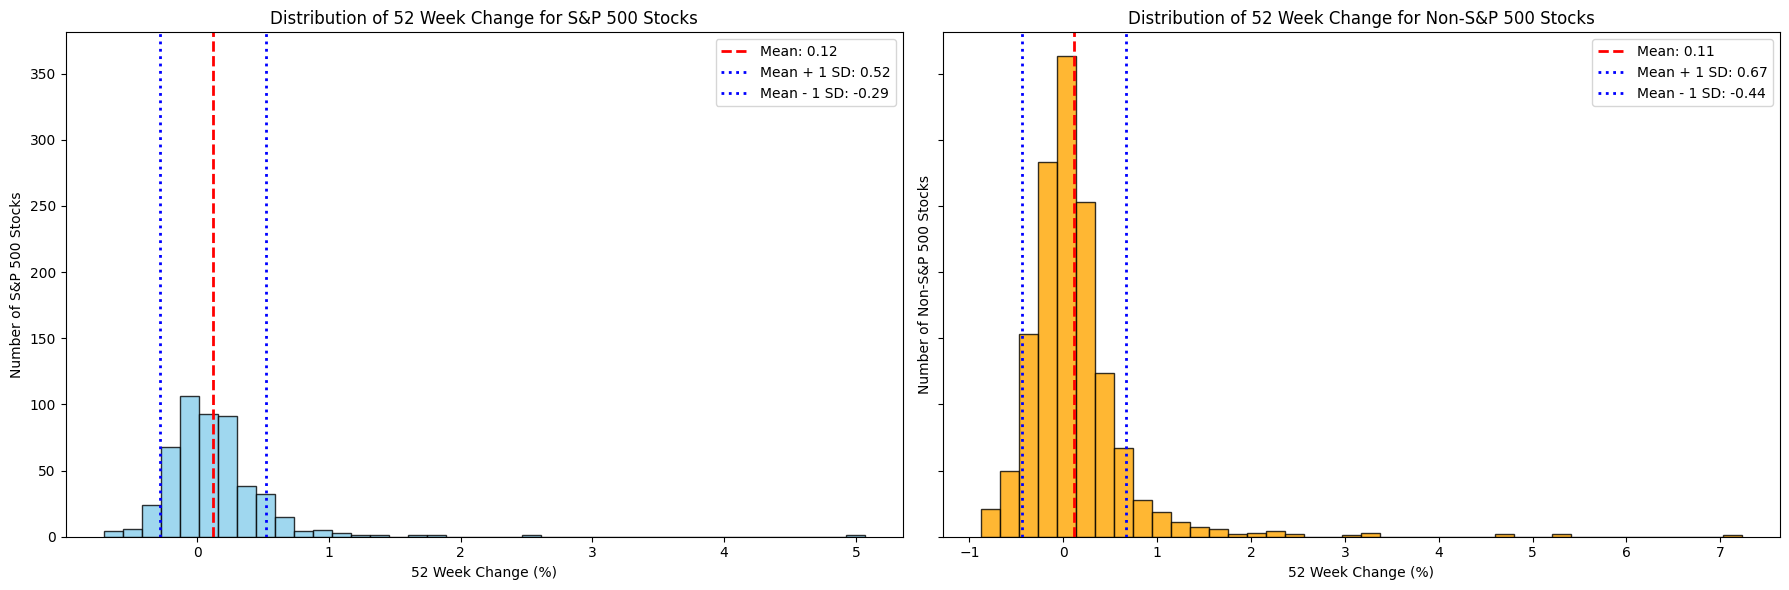

In [24]:
# Distribution plot of 52 week change (52W_Change) for S&P 500 and non-S&P 500 stocks side by side, with mean and std dev

sp500_mask = data['SP500'] == 'S&P 500'
nonsp500_mask = data['SP500'] != 'S&P 500'
sp500_52w_change = data.loc[sp500_mask, '52W_Change'].dropna()
nonsp500_52w_change = data.loc[nonsp500_mask, '52W_Change'].dropna()

mean_sp500 = sp500_52w_change.mean()
std_sp500 = sp500_52w_change.std()
mean_nonsp500 = nonsp500_52w_change.mean()
std_nonsp500 = nonsp500_52w_change.std()

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# S&P 500 plot
axes[0].hist(sp500_52w_change, bins=40, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('52 Week Change (%)')
axes[0].set_ylabel('Number of S&P 500 Stocks')
axes[0].set_title('Distribution of 52 Week Change for S&P 500 Stocks')
axes[0].axvline(mean_sp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_sp500:.2f}")
axes[0].axvline(mean_sp500 + std_sp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean + 1 SD: {(mean_sp500 + std_sp500):.2f}")
axes[0].axvline(mean_sp500 - std_sp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean - 1 SD: {(mean_sp500 - std_sp500):.2f}")
axes[0].legend()

# Non-S&P 500 plot
axes[1].hist(nonsp500_52w_change, bins=40, color='orange', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('52 Week Change (%)')
axes[1].set_ylabel('Number of Non-S&P 500 Stocks')
axes[1].set_title('Distribution of 52 Week Change for Non-S&P 500 Stocks')
axes[1].axvline(mean_nonsp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_nonsp500:.2f}")
axes[1].axvline(mean_nonsp500 + std_nonsp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean + 1 SD: {(mean_nonsp500 + std_nonsp500):.2f}")
axes[1].axvline(mean_nonsp500 - std_nonsp500, color='blue', linestyle='dotted', linewidth=2, label=f"Mean - 1 SD: {(mean_nonsp500 - std_nonsp500):.2f}")
axes[1].legend()

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6. Other Stock Graphics

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.1 Revenue Growth vs Earnings Growth - Scatter

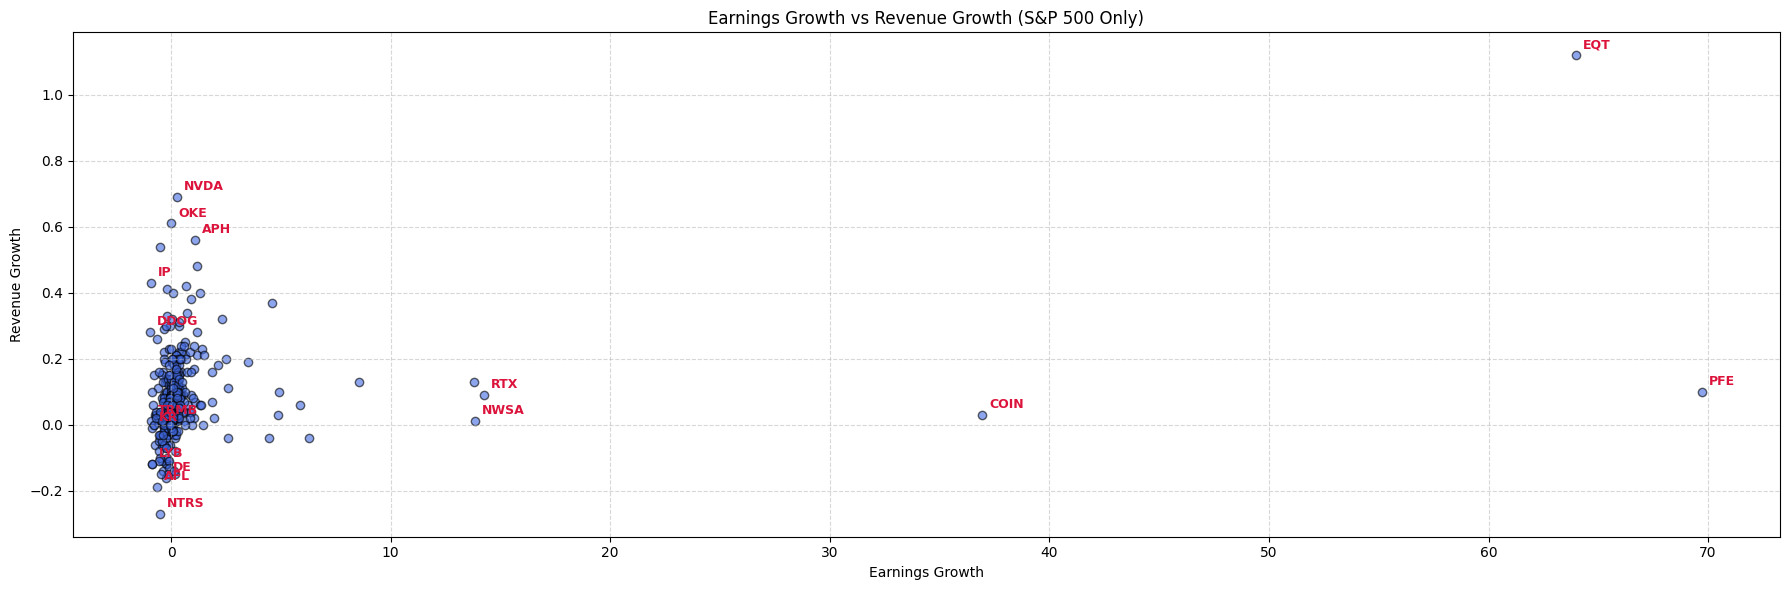

In [25]:
# Scatter plot comparing Earnings Growth (Earn_Gr) with Revenue Growth (Rev_Gr) for S&P 500 stocks only
sp500_data = data[data['SP500'] == 'S&P 500']

plt.figure(figsize=(18, 6))
plt.scatter(sp500_data['Earn_Gr'], sp500_data['Rev_Gr'], alpha=0.6, c='royalblue', edgecolor='k')

plt.xlabel('Earnings Growth')
plt.ylabel('Revenue Growth')
plt.title('Earnings Growth vs Revenue Growth (S&P 500 Only)')
plt.grid(True, linestyle='--', alpha=0.5)

# Identify outliers: e.g., points where either Earn_Gr or Rev_Gr is in the top/bottom 1%
earn_gr = sp500_data['Earn_Gr']
rev_gr = sp500_data['Rev_Gr']

# Calculate thresholds for outliers (top/bottom 1%)
earn_gr_low, earn_gr_high = earn_gr.quantile([0.01, 0.99])
rev_gr_low, rev_gr_high = rev_gr.quantile([0.01, 0.99])

# Boolean mask for outliers
outlier_mask = (
    (earn_gr <= earn_gr_low) | (earn_gr >= earn_gr_high) |
    (rev_gr <= rev_gr_low) | (rev_gr >= rev_gr_high)
)

# Annotate outliers with their symbol names
for idx, row in sp500_data[outlier_mask].iterrows():
    plt.annotate(
        row['Symbol'],
        (row['Earn_Gr'], row['Rev_Gr']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='crimson',
        weight='bold'
    )

plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.2 Revenue Growth and Earnings Growth - Bars
</div>

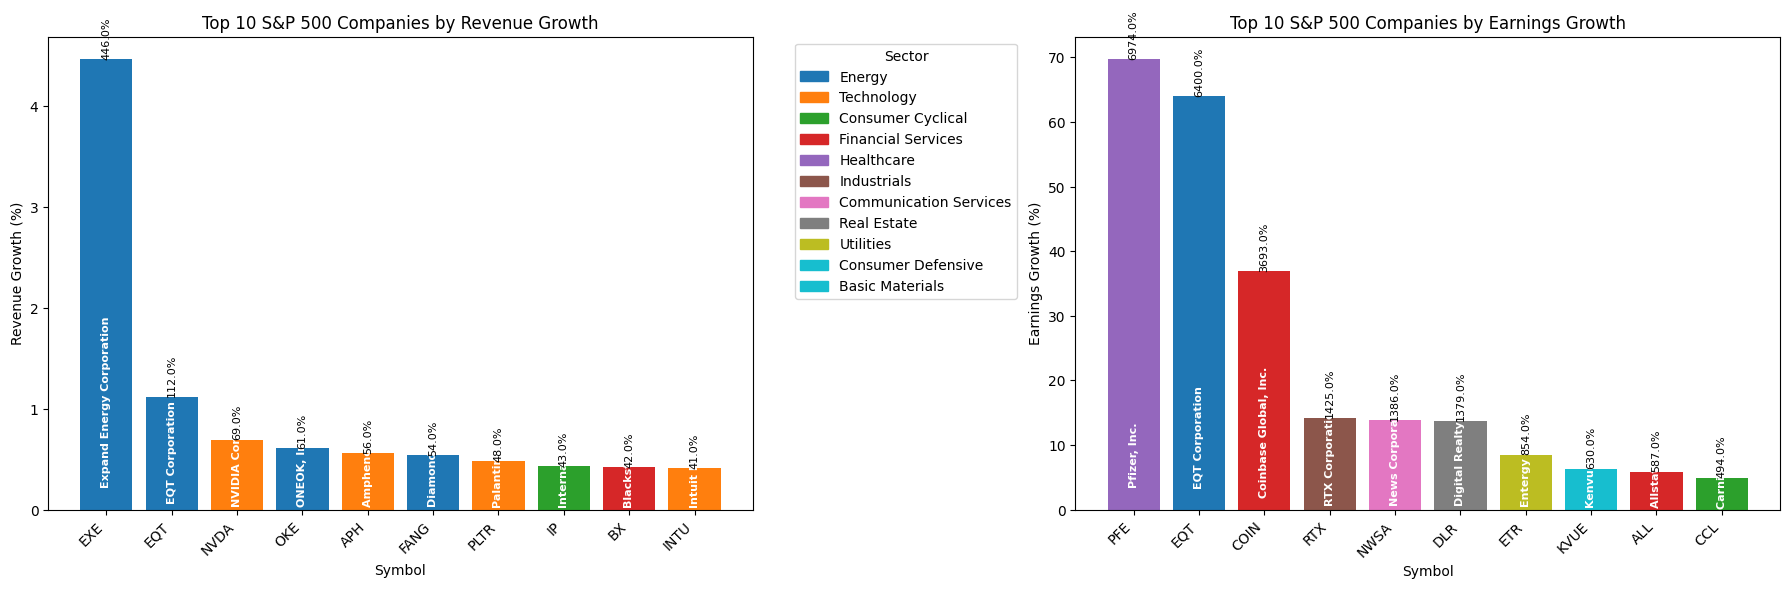

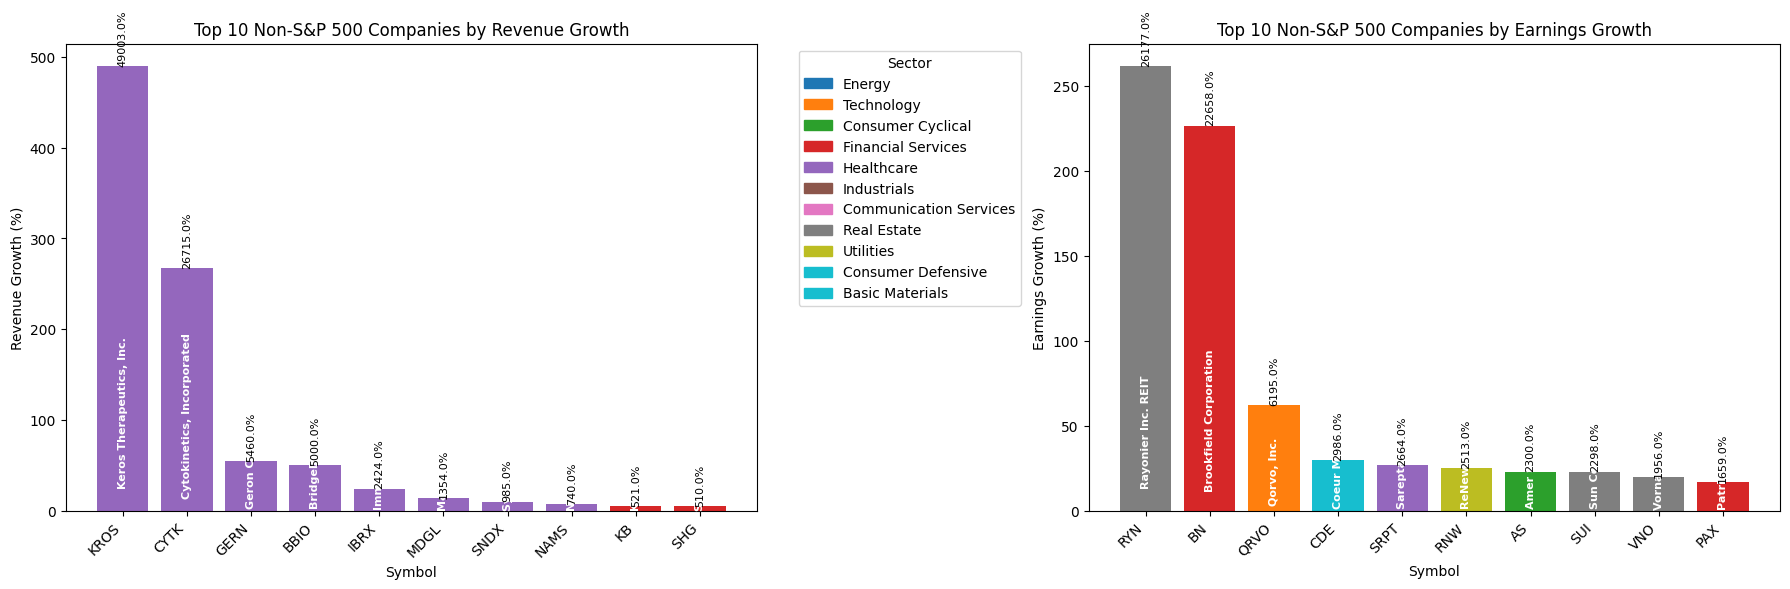

In [26]:
# Top 10 S&P 500 companies by Revenue Growth AND Earnings Growth (side by side, synced sector colors, show % only)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# --- Get all sectors present in both S&P 500 and non-S&P 500 top 10s ---
# Filter S&P 500 and non-S&P 500 companies
sp500_data = data[data['SP500'] == 'S&P 500']
nonsp500_data = data[data['SP500'] != 'S&P 500']

# Get top 10 for each metric
top10_rev_growth = sp500_data.sort_values('Rev_Gr', ascending=False).head(10)
top10_earn_growth = sp500_data.sort_values('Earn_Gr', ascending=False).head(10)
top10_rev_growth_nonsp = nonsp500_data.sort_values('Rev_Gr', ascending=False).head(10)
top10_earn_growth_nonsp = nonsp500_data.sort_values('Earn_Gr', ascending=False).head(10)

# Find all unique sectors across all four top 10s
all_sectors_combined = pd.unique(
    pd.concat([
        top10_rev_growth['Sector'],
        top10_earn_growth['Sector'],
        top10_rev_growth_nonsp['Sector'],
        top10_earn_growth_nonsp['Sector']
    ])
)
# Assign colors to all sectors (same mapping for all plots)
cmap = plt.colormaps['tab10']
sector_colors = cmap(np.linspace(0, 1, len(all_sectors_combined)))
sector_color_map = {sector: color for sector, color in zip(all_sectors_combined, sector_colors)}

# --- S&P 500 Plots ---
rev_bar_colors = top10_rev_growth['Sector'].map(sector_color_map)
earn_bar_colors = top10_earn_growth['Sector'].map(sector_color_map)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Revenue Growth Barplot (S&P 500)
ax = axes[0]
bars = ax.bar(
    top10_rev_growth['Symbol'],
    top10_rev_growth['Rev_Gr'],
    color=rev_bar_colors
)
ax.set_xlabel('Symbol')
ax.set_ylabel('Revenue Growth (%)')
ax.set_title('Top 10 S&P 500 Companies by Revenue Growth')
ax.set_xticks(np.arange(len(top10_rev_growth['Symbol'])))
ax.set_xticklabels(top10_rev_growth['Symbol'], rotation=45, ha='right')

# Annotate bars with company names inside and % above
for bar, name, pct in zip(bars, top10_rev_growth['Company_Name'], top10_rev_growth['Rev_Gr']):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height * 0.05,
        name,
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90,
        color='white' if height > 0 else 'black',
        fontweight='bold'
    )
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{pct*100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

# Add legend for all sectors (only on the left plot, one legend per line)
legend_handles = [Patch(color=sector_color_map[sector], label=sector) for sector in all_sectors_combined]
ax.legend(handles=legend_handles, title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

# Earnings Growth Barplot (S&P 500)
ax2 = axes[1]
bars2 = ax2.bar(
    top10_earn_growth['Symbol'],
    top10_earn_growth['Earn_Gr'],
    color=earn_bar_colors
)
ax2.set_xlabel('Symbol')
ax2.set_ylabel('Earnings Growth (%)')
ax2.set_title('Top 10 S&P 500 Companies by Earnings Growth')
ax2.set_xticks(np.arange(len(top10_earn_growth['Symbol'])))
ax2.set_xticklabels(top10_earn_growth['Symbol'], rotation=45, ha='right')

for bar, name, pct in zip(bars2, top10_earn_growth['Company_Name'], top10_earn_growth['Earn_Gr']):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height * 0.05,
        name,
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90,
        color='white' if height > 0 else 'black',
        fontweight='bold'
    )
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{pct*100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

# No legend on the right plot

plt.tight_layout()
plt.show()

# --- Non-S&P 500 Plots ---
rev_bar_colors_nonsp = top10_rev_growth_nonsp['Sector'].map(sector_color_map)
earn_bar_colors_nonsp = top10_earn_growth_nonsp['Sector'].map(sector_color_map)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Revenue Growth Barplot (non-S&P 500)
ax = axes[0]
bars = ax.bar(
    top10_rev_growth_nonsp['Symbol'],
    top10_rev_growth_nonsp['Rev_Gr'],
    color=rev_bar_colors_nonsp
)
ax.set_xlabel('Symbol')
ax.set_ylabel('Revenue Growth (%)')
ax.set_title('Top 10 Non-S&P 500 Companies by Revenue Growth')
ax.set_xticks(np.arange(len(top10_rev_growth_nonsp['Symbol'])))
ax.set_xticklabels(top10_rev_growth_nonsp['Symbol'], rotation=45, ha='right')

for bar, name, pct in zip(bars, top10_rev_growth_nonsp['Company_Name'], top10_rev_growth_nonsp['Rev_Gr']):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height * 0.05,
        name,
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90,
        color='white' if height > 0 else 'black',
        fontweight='bold'
    )
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{pct*100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

# Add legend for all sectors (only on the left plot, one legend per line)
ax.legend(handles=legend_handles, title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

# Earnings Growth Barplot (non-S&P 500)
ax2 = axes[1]
bars2 = ax2.bar(
    top10_earn_growth_nonsp['Symbol'],
    top10_earn_growth_nonsp['Earn_Gr'],
    color=earn_bar_colors_nonsp
)
ax2.set_xlabel('Symbol')
ax2.set_ylabel('Earnings Growth (%)')
ax2.set_title('Top 10 Non-S&P 500 Companies by Earnings Growth')
ax2.set_xticks(np.arange(len(top10_earn_growth_nonsp['Symbol'])))
ax2.set_xticklabels(top10_earn_growth_nonsp['Symbol'], rotation=45, ha='right')

for bar, name, pct in zip(bars2, top10_earn_growth_nonsp['Company_Name'], top10_earn_growth_nonsp['Earn_Gr']):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height * 0.05,
        name,
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90,
        color='white' if height > 0 else 'black',
        fontweight='bold'
    )
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{pct*100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

# No legend on the right plot

plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.3 Dividends by Sector
</div>

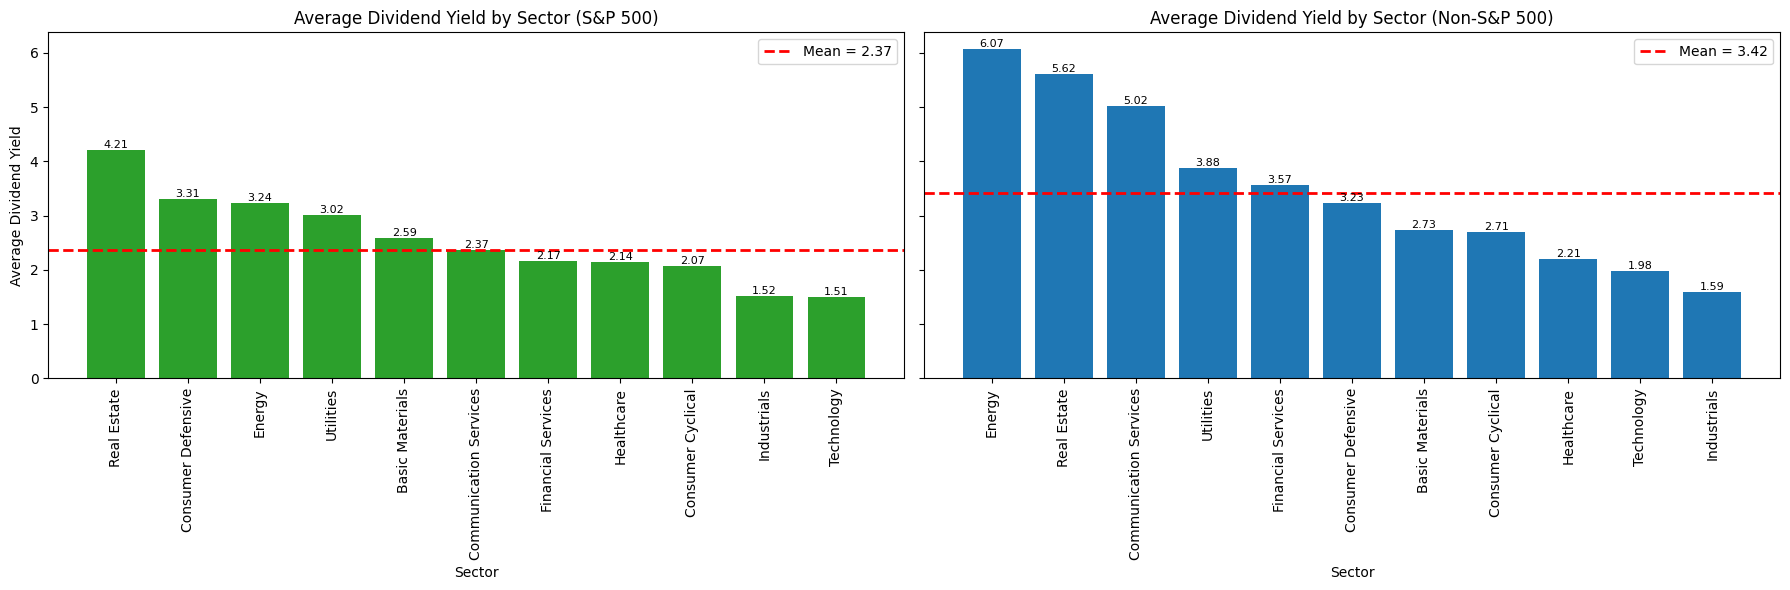

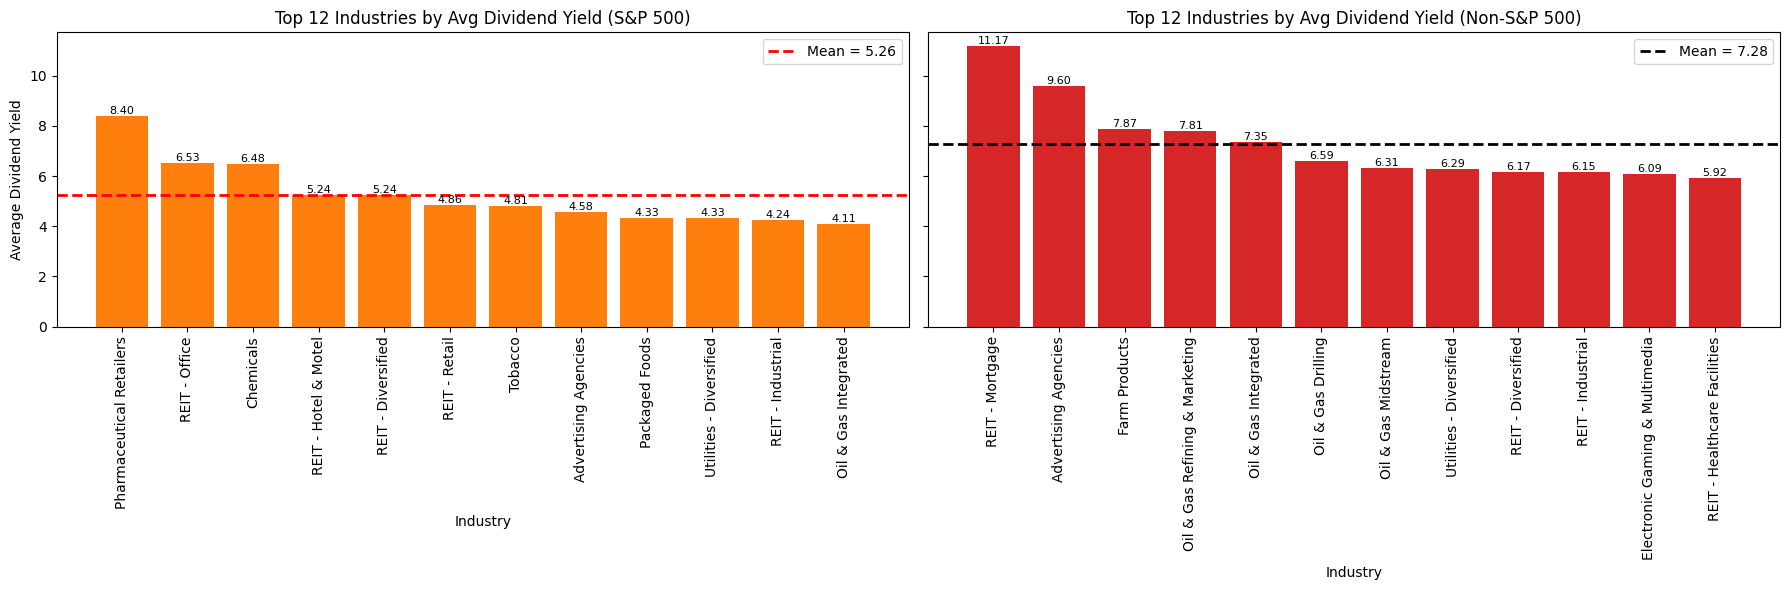

In [27]:
# Calculate average Dividend Yield (Div_Y) by sector for S&P 500 and non-S&P 500 companies

import matplotlib.pyplot as plt

# --- 1. S&P 500 by Sector and 2. Non-S&P 500 by Sector ---
avg_div_y_sp500 = data[data['SP500'] == 'S&P 500'].groupby('Sector')['Div_Y'].mean().sort_values(ascending=False)
avg_div_y_nonsp500 = data[data['SP500'] != 'S&P 500'].groupby('Sector')['Div_Y'].mean().sort_values(ascending=False)

mean_div_y_sp500 = data[(data['SP500'] == 'S&P 500') & (data['Div_Y'].notna())]['Div_Y'].mean()
mean_div_y_nonsp500 = data[(data['SP500'] != 'S&P 500') & (data['Div_Y'].notna())]['Div_Y'].mean()

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# S&P 500 by Sector
axes[0].bar(avg_div_y_sp500.index, avg_div_y_sp500.values, color='#2ca02c')  # green
axes[0].set_title('Average Dividend Yield by Sector (S&P 500)')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Average Dividend Yield')
axes[0].tick_params(axis='x', rotation=90)
axes[0].axhline(mean_div_y_sp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_div_y_sp500:.2f}")
axes[0].legend()
for i, v in enumerate(avg_div_y_sp500.values):
    axes[0].text(i, v if v > 0 else 0, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

# Non-S&P 500 by Sector
axes[1].bar(avg_div_y_nonsp500.index, avg_div_y_nonsp500.values, color='#1f77b4')  # blue
axes[1].set_title('Average Dividend Yield by Sector (Non-S&P 500)')
axes[1].set_xlabel('Sector')
axes[1].tick_params(axis='x', rotation=90)
axes[1].axhline(mean_div_y_nonsp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_div_y_nonsp500:.2f}")
axes[1].legend()
for i, v in enumerate(avg_div_y_nonsp500.values):
    axes[1].text(i, v if v > 0 else 0, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# --- 3. S&P 500 by Top 12 Industries and 4. Non-S&P 500 by Top 12 Industries ---
avg_div_y_industry_sp500 = data[data['SP500'] == 'S&P 500'].groupby('Industry')['Div_Y'].mean().sort_values(ascending=False).head(12)
avg_div_y_industry_nonsp500 = data[data['SP500'] != 'S&P 500'].groupby('Industry')['Div_Y'].mean().sort_values(ascending=False).head(12)

mean_div_y_industry_sp500 = avg_div_y_industry_sp500.mean()
mean_div_y_industry_nonsp500 = avg_div_y_industry_nonsp500.mean()

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# S&P 500 by Industry
axes[0].bar(avg_div_y_industry_sp500.index, avg_div_y_industry_sp500.values, color='#ff7f0e')  # orange
axes[0].set_title('Top 12 Industries by Avg Dividend Yield (S&P 500)')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Average Dividend Yield')
axes[0].tick_params(axis='x', rotation=90)
axes[0].axhline(mean_div_y_industry_sp500, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_div_y_industry_sp500:.2f}")
axes[0].legend()
for i, v in enumerate(avg_div_y_industry_sp500.values):
    axes[0].text(i, v if v > 0 else 0, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

# Non-S&P 500 by Industry
axes[1].bar(avg_div_y_industry_nonsp500.index, avg_div_y_industry_nonsp500.values, color='#d62728')  # red
axes[1].set_title('Top 12 Industries by Avg Dividend Yield (Non-S&P 500)')
axes[1].set_xlabel('Industry')
axes[1].tick_params(axis='x', rotation=90)
axes[1].axhline(mean_div_y_industry_nonsp500, color='black', linestyle='dashed', linewidth=2, label=f"Mean = {mean_div_y_industry_nonsp500:.2f}")
axes[1].legend()
for i, v in enumerate(avg_div_y_industry_nonsp500.values):
    axes[1].text(i, v if v > 0 else 0, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()




<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.4 Top 15 S&P 500 Banks and Insurance Companies by Market Capitalisation
</div>

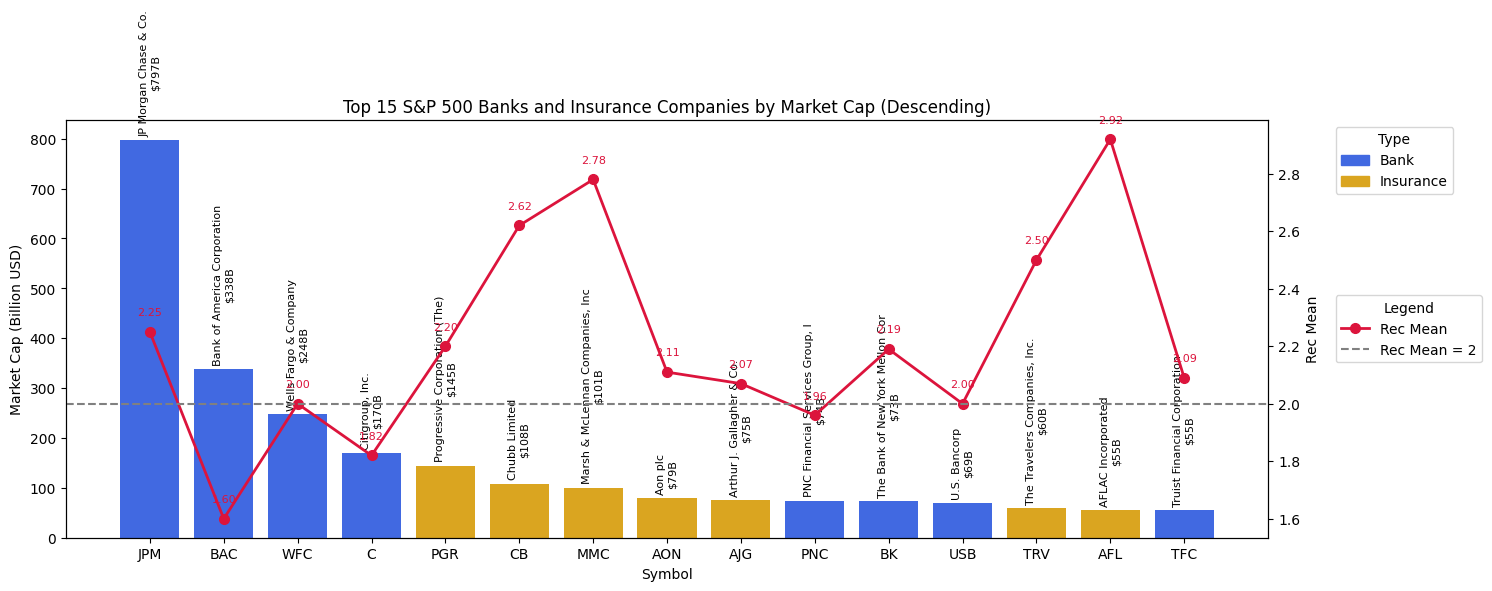

In [28]:
# Filter for banks and insurance companies in S&P 500
banks_insurance = data[
    (data['SP500'] == 'S&P 500') &
    (
        data['Industry'].str.contains('Bank', case=False, na=False) |
        data['Industry'].str.contains('Insurance', case=False, na=False)
    )
]

# Get top 15 by Market Cap (descending)
top15_banks_ins = banks_insurance.sort_values('Market_Cap', ascending=False).head(15).copy()

# Classify as 'Bank' or 'Insurance'
def classify_type(industry):
    if 'bank' in str(industry).lower():
        return 'Bank'
    elif 'insurance' in str(industry).lower():
        return 'Insurance'
    else:
        return 'Other'

top15_banks_ins['Type'] = top15_banks_ins['Industry'].apply(classify_type)

# Assign colors
type_color_map = {'Bank': 'royalblue', 'Insurance': 'goldenrod'}
bar_colors = top15_banks_ins['Type'].map(type_color_map)

import matplotlib.pyplot as plt
import numpy as np

# Sort for descending order in vertical bar chart (largest at left)
top15_banks_ins = top15_banks_ins.sort_values('Market_Cap', ascending=False)

fig, ax1 = plt.subplots(figsize=(15, 6))

bars = ax1.bar(
    top15_banks_ins['Symbol'],
    top15_banks_ins['Market_Cap'],
    color=bar_colors
)
ax1.set_xlabel('Symbol')
ax1.set_ylabel('Market Cap (Billion USD)')
ax1.set_title('Top 15 S&P 500 Banks and Insurance Companies by Market Cap (Descending)')
# Removed set_xticklabels to avoid UserWarning

# Annotate bars with company names and market cap, above the bar, rotated for clarity
for bar, name, mcap in zip(bars, top15_banks_ins['Company_Name'], top15_banks_ins['Market_Cap']):
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + max(top15_banks_ins['Market_Cap']) * 0.01,
        f"{name}\n${mcap:,.0f}B",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

# Add legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=type_color_map[t], label=t) for t in type_color_map]
ax1.legend(handles=legend_handles, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add second axis for Rec_Mean
ax2 = ax1.twinx()
ax2.plot(
    top15_banks_ins['Symbol'],
    top15_banks_ins['Rec_Mean'],
    color='crimson',
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=7,
    label='Rec Mean'
)
ax2.set_ylabel('Rec Mean')
ax2.grid(False)

# Add constant line for Rec Mean = 2
ax2.axhline(y=2, color='gray', linestyle='--', linewidth=1.5, label='Rec Mean = 2')

# Optionally, add Rec_Mean values as text
for x, rec in enumerate(top15_banks_ins['Rec_Mean']):
    ax2.text(
        x,
        rec + 0.05,
        f"{rec:.2f}",
        color='crimson',
        va='bottom',
        ha='center',
        fontsize=8
    )

# Add legend for Rec Mean line
lines_labels = [ax2.get_legend_handles_labels(), ax1.get_legend_handles_labels()]
lines = sum([l[0] for l in lines_labels], [])
labels = sum([l[1] for l in lines_labels], [])
ax2.legend(lines, labels, title='Legend', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.5 Top 10 Stocks vs S&P 500 and vs rest 2000 companies
</div>

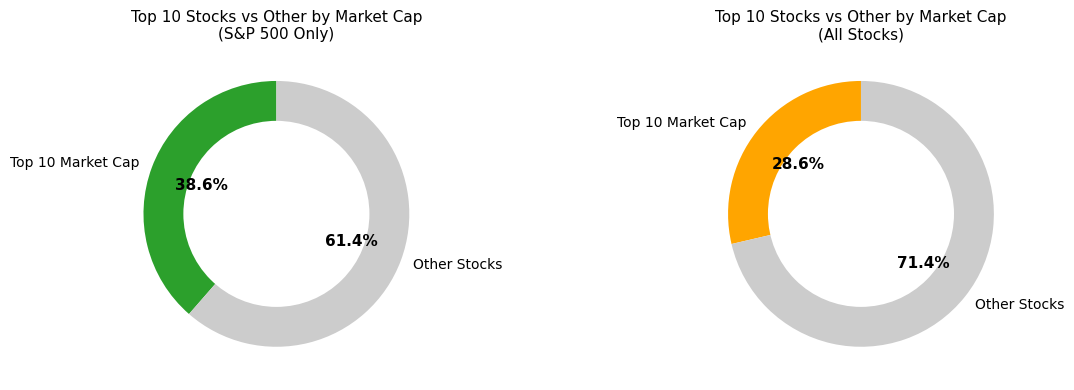

In [29]:
# Calculate top 10 stocks by Market Cap in the whole market and their % of total Market Cap
# And next to it, do the same for S&P 500 only

# Sort by Market Cap descending and get top 10 for whole market
top10_market = data.sort_values('Market_Cap', ascending=False).head(10)
total_market_cap = data['Market_Cap'].sum()
top10_market_cap_sum = top10_market['Market_Cap'].sum()
top10_market_pct = (top10_market_cap_sum / total_market_cap) * 100

# For S&P 500 only
sp500 = data[data['SP500'] == 'S&P 500']
top10_sp500 = sp500.sort_values('Market_Cap', ascending=False).head(10)
total_sp500_cap = sp500['Market_Cap'].sum()
top10_sp500_cap_sum = top10_sp500['Market_Cap'].sum()
top10_sp500_pct = (top10_sp500_cap_sum / total_sp500_cap) * 100

# Doughnut chart: Top 10 sum vs Other for both
labels = ["Top 10 Market Cap", "Other Stocks"]
colors_sp500 = ['#2ca02c', '#cccccc']  # green for S&P 500
colors_market = ['orange', '#cccccc']  # orange for All Market

# Change the position of the graphics: S&P 500 on the left, All Market on the right
fig, (ax_sp500, ax_market) = plt.subplots(1, 2, figsize=(12, 4))

# S&P 500 only (now on the left)
sizes_sp500 = [top10_sp500_cap_sum, total_sp500_cap - top10_sp500_cap_sum]
wedges_sp500, texts_sp500, autotexts_sp500 = ax_sp500.pie(
    sizes_sp500,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 2 else '',
    startangle=90,
    colors=colors_sp500,
    wedgeprops=dict(width=0.4)
)
plt.setp(autotexts_sp500, size=11, weight="bold")
ax_sp500.set_title("Top 10 Stocks vs Other by Market Cap\n(S&P 500 Only)", fontsize=11)
centre_circle_sp500 = plt.Circle((0,0),0.70,fc='white')
ax_sp500.add_artist(centre_circle_sp500)

# Whole market (now on the right) - color changed to orange
sizes_market = [top10_market_cap_sum, total_market_cap - top10_market_cap_sum]
wedges_market, texts_market, autotexts_market = ax_market.pie(
    sizes_market,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 2 else '',
    startangle=90,
    colors=colors_market,
    wedgeprops=dict(width=0.4)
)
plt.setp(autotexts_market, size=11, weight="bold")
ax_market.set_title("Top 10 Stocks vs Other by Market Cap\n(All Stocks)", fontsize=11)
centre_circle_market = plt.Circle((0,0),0.70,fc='white')
ax_market.add_artist(centre_circle_market)

plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.6 Market Cap of US vs Non US Companies and Employee Distribution of S&P500 vs Non S&P 500
</div>

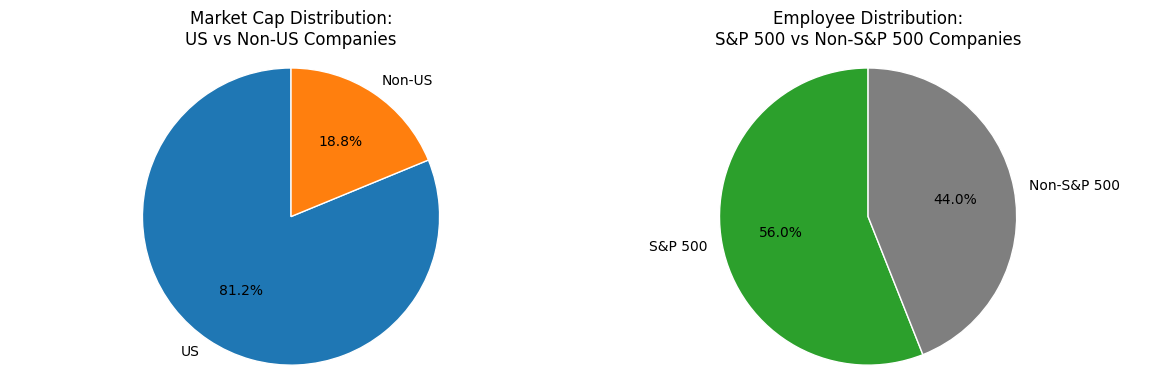

In [30]:
# Combined Pie Charts: Market Cap (US vs Non-US) and Employees (S&P 500 vs Non-S&P 500)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart 1: Market Cap US vs Non-US
is_us = data['Country'] == 'United States'
us_market_cap = data.loc[is_us, 'Market_Cap'].sum()
nonus_market_cap = data.loc[~is_us, 'Market_Cap'].sum()
labels1 = ['US', 'Non-US']
sizes1 = [us_market_cap, nonus_market_cap]
colors1 = ['tab:blue', 'tab:orange']

axes[0].pie(
    sizes1,
    labels=labels1,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors1,
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('Market Cap Distribution:\nUS vs Non-US Companies')
axes[0].axis('equal')

# Pie chart 2: Employees S&P 500 vs Non-S&P 500
is_sp500 = data['SP500'] == 'S&P 500'
sp500_employees = data.loc[is_sp500, 'Empl_K'].sum()
nonsp500_employees = data.loc[~is_sp500, 'Empl_K'].sum()
labels2 = ['S&P 500', 'Non-S&P 500']
sizes2 = [sp500_employees, nonsp500_employees]
colors2 = ['tab:green', 'tab:gray']

axes[1].pie(
    sizes2,
    labels=labels2,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors2,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Employee Distribution:\nS&P 500 vs Non-S&P 500 Companies')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.7 Average Trailing PE and Feature PE by Sector
</div>

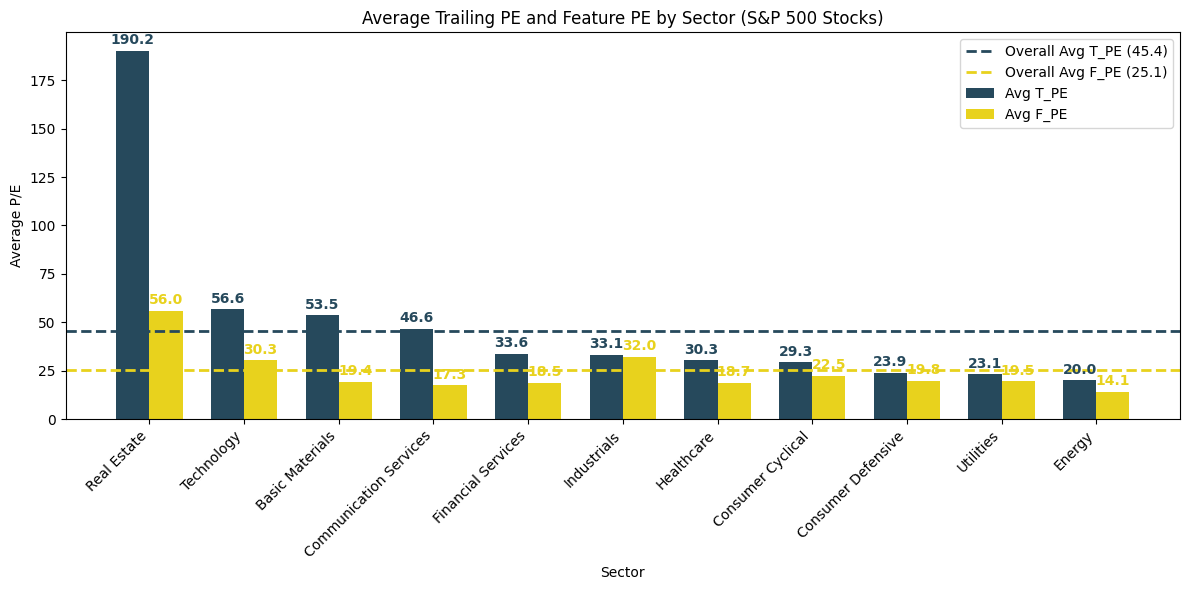

In [31]:
# Group S&P 500 stocks by Sector and calculate average T_PE and F_PE for each sector
sp500 = data[data['SP500'] == 'S&P 500']
sector_avg = sp500.groupby('Sector')[['T_PE', 'F_PE']].mean().sort_values('T_PE', ascending=False)

# Plot Average T_PE and F_PE by Sector as grouped bar chart (single axis)
fig, ax = plt.subplots(figsize=(12,6))

sectors = sector_avg.index
x = range(len(sectors))
width = 0.35

color1 = '#26495c'
color2 = '#e8d21d'

bars1 = ax.bar([i - width/2 for i in x], sector_avg['T_PE'], color=color1, width=width, label='Avg T_PE')
bars2 = ax.bar([i + width/2 for i in x], sector_avg['F_PE'], color=color2, width=width, label='Avg F_PE')

ax.set_ylabel('Average P/E')
ax.set_xlabel('Sector')
ax.set_xticks(x)
ax.set_xticklabels(sectors, rotation=45, ha='right')
ax.set_title('Average Trailing PE and Feature PE by Sector (S&P 500 Stocks)')

# Add values to T_PE bars
for i, v in enumerate(sector_avg['T_PE']):
    ax.text(i - width/2, v + max(sector_avg['T_PE'].max(), sector_avg['F_PE'].max()) * 0.01, f"{v:.1f}", 
            color=color1, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add values to F_PE bars
for i, v in enumerate(sector_avg['F_PE']):
    ax.text(i + width/2, v + max(sector_avg['T_PE'].max(), sector_avg['F_PE'].max()) * 0.01, f"{v:.1f}", 
            color=color2, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add 2 lines for overall average T_PE and F_PE
overall_tpe = sp500['T_PE'].mean()
overall_fpe = sp500['F_PE'].mean()
ax.axhline(overall_tpe, color=color1, linestyle='--', linewidth=2, label=f'Overall Avg T_PE ({overall_tpe:.1f})')
ax.axhline(overall_fpe, color=color2, linestyle='--', linewidth=2, label=f'Overall Avg F_PE ({overall_fpe:.1f})')

ax.legend()
plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.8 Return of Equity vs Retrun of Assets
</div>

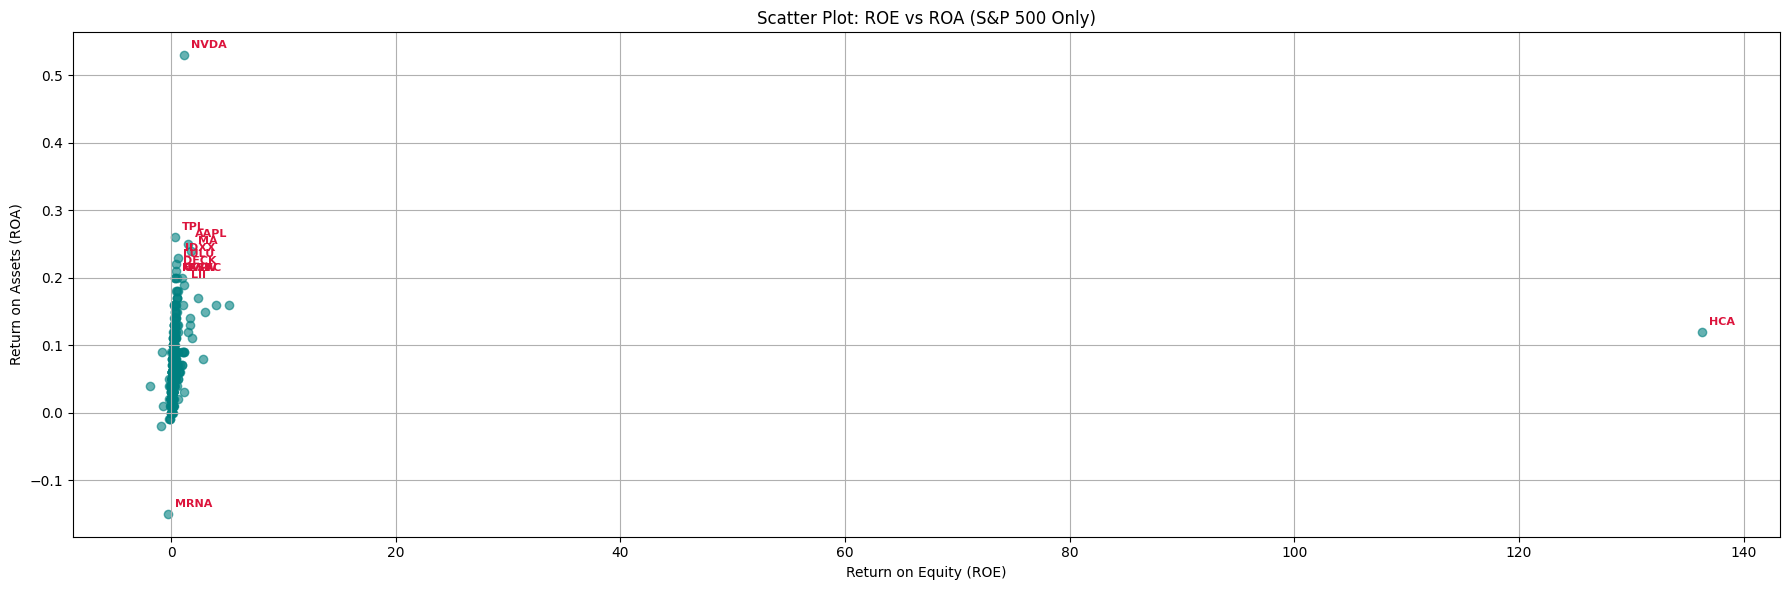

In [32]:

import matplotlib.pyplot as plt
import numpy as np

sp500_data = data[data['SP500'] == 'S&P 500']

# Scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(sp500_data['ROE'], sp500_data['ROA'], alpha=0.6, color='teal')
plt.xlabel('Return on Equity (ROE)')
plt.ylabel('Return on Assets (ROA)')
plt.title('Scatter Plot: ROE vs ROA (S&P 500 Only)')
plt.grid(True)

# Identify outliers: those with ROE or ROA more than 2 std from mean
roe_mean, roe_std = sp500_data['ROE'].mean(), sp500_data['ROE'].std()
roa_mean, roa_std = sp500_data['ROA'].mean(), sp500_data['ROA'].std()

outliers = sp500_data[
    (np.abs(sp500_data['ROE'] - roe_mean) > 2 * roe_std) |
    (np.abs(sp500_data['ROA'] - roa_mean) > 2 * roa_std)
]

# Annotate outliers with ticker (Symbol)
for _, row in outliers.iterrows():
    plt.annotate(
        row['Symbol'],
        (row['ROE'], row['ROA']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=8,
        color='crimson',
        weight='bold'
    )

plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.9 Enterprise Value/EBITDA vs Return of Equity
</div>

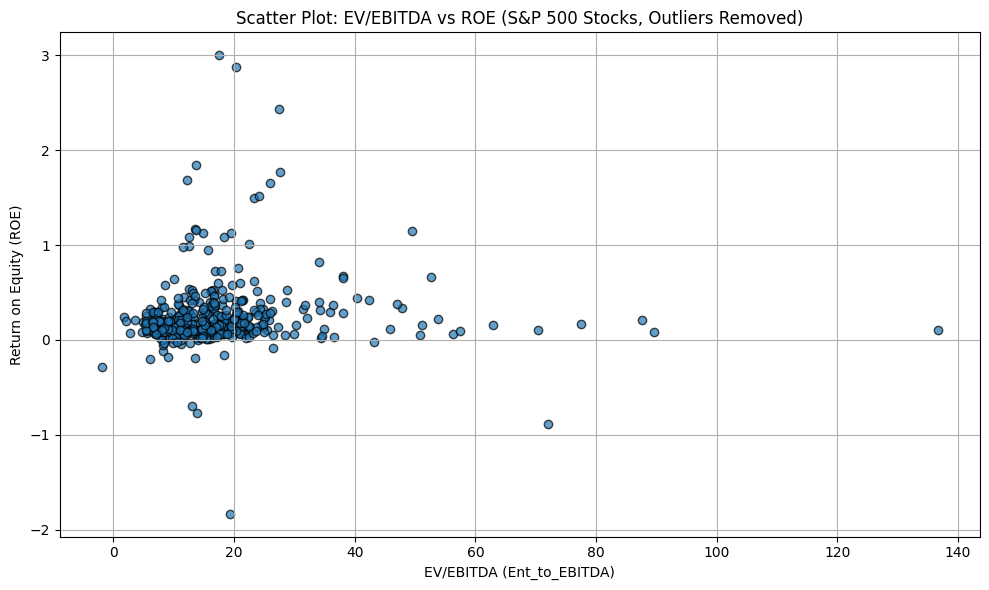

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for S&P 500 stocks
sp500_data = data[data['SP500'] == 'S&P 500']

# Remove outliers based on ROE and Ent_to_EBITDA (using 2 standard deviations)
roe_mean = sp500_data['ROE'].mean()
roe_std = sp500_data['ROE'].std()
ev_ebitda_mean = sp500_data['Ent_to_EBITDA'].mean()
ev_ebitda_std = sp500_data['Ent_to_EBITDA'].std()

filtered_sp500 = sp500_data[
    (np.abs(sp500_data['ROE'] - roe_mean) <= 0.5 * roe_std) &
    (np.abs(sp500_data['Ent_to_EBITDA'] - ev_ebitda_mean) <= 0.5 * ev_ebitda_std)
]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_sp500['Ent_to_EBITDA'], filtered_sp500['ROE'], alpha=0.7, edgecolor='k')
plt.xlabel('EV/EBITDA (Ent_to_EBITDA)')
plt.ylabel('Return on Equity (ROE)')
plt.title('Scatter Plot: EV/EBITDA vs ROE (S&P 500 Stocks, Outliers Removed)')
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.10 Radar Chart for Main Margins
</div>

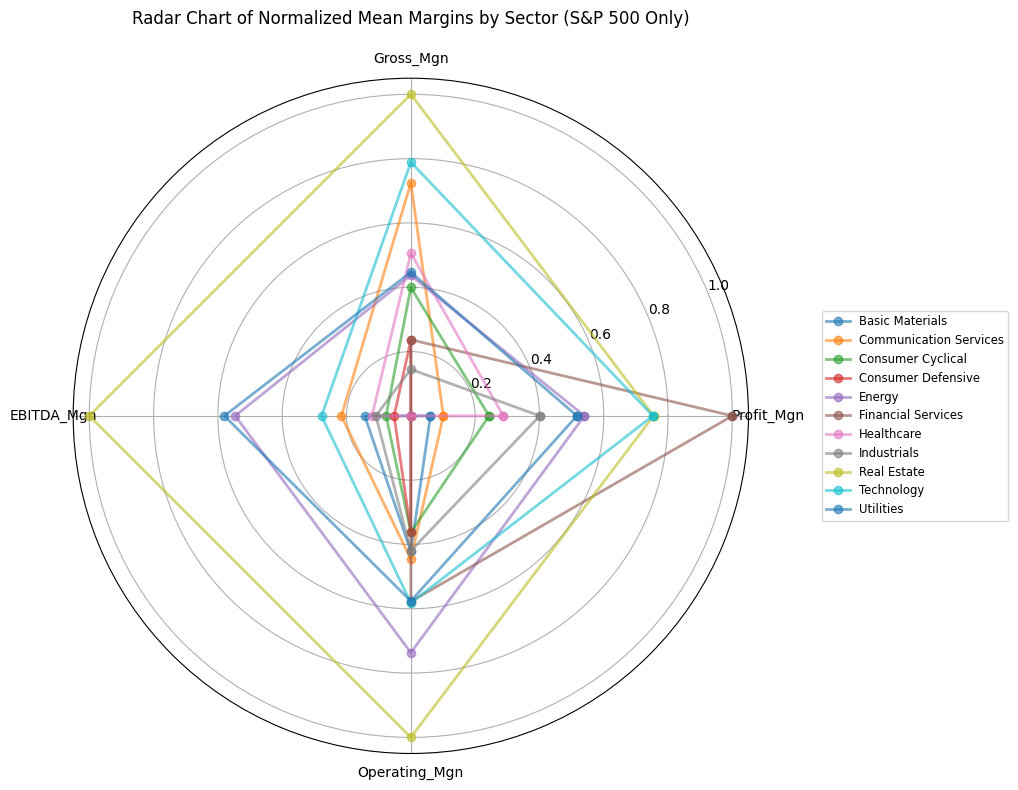

In [34]:
# Radar chart (spider plot) of mean margin metrics by sector, for S&P 500 sectors only

import matplotlib.pyplot as plt
import numpy as np

# Select only margin metrics for the radar chart
margin_metrics = ['Profit_Mgn', 'Gross_Mgn', 'EBITDA_Mgn', 'Operating_Mgn']

# Compute mean values by sector for S&P 500 only
sp500_data = data[data['SP500'] == 'S&P 500']
sp500_sector_margins = (
    sp500_data.groupby('Sector')[margin_metrics]
    .mean()
    .dropna()
)

# Normalize S&P 500 sector margins (min-max scaling per metric, using S&P 500 sector min/max)
sp500_sector_margins_norm = (sp500_sector_margins - sp500_sector_margins.min()) / (sp500_sector_margins.max() - sp500_sector_margins.min())

# Radar chart setup
labels = margin_metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

plt.figure(figsize=(12, 8))

for sector in sp500_sector_margins_norm.index:
    values = sp500_sector_margins_norm.loc[sector].tolist()
    values += values[:1]
    plt.polar(angles, values, marker='o', label=sector, linewidth=2, alpha=0.6)

plt.xticks(angles[:-1], labels)
plt.title('Radar Chart of Normalized Mean Margins by Sector (S&P 500 Only)', pad=20)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', ncol=1)
plt.tight_layout()
plt.show()




<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.11 Top 10 Countries Out of US in US Stock Market
</div>

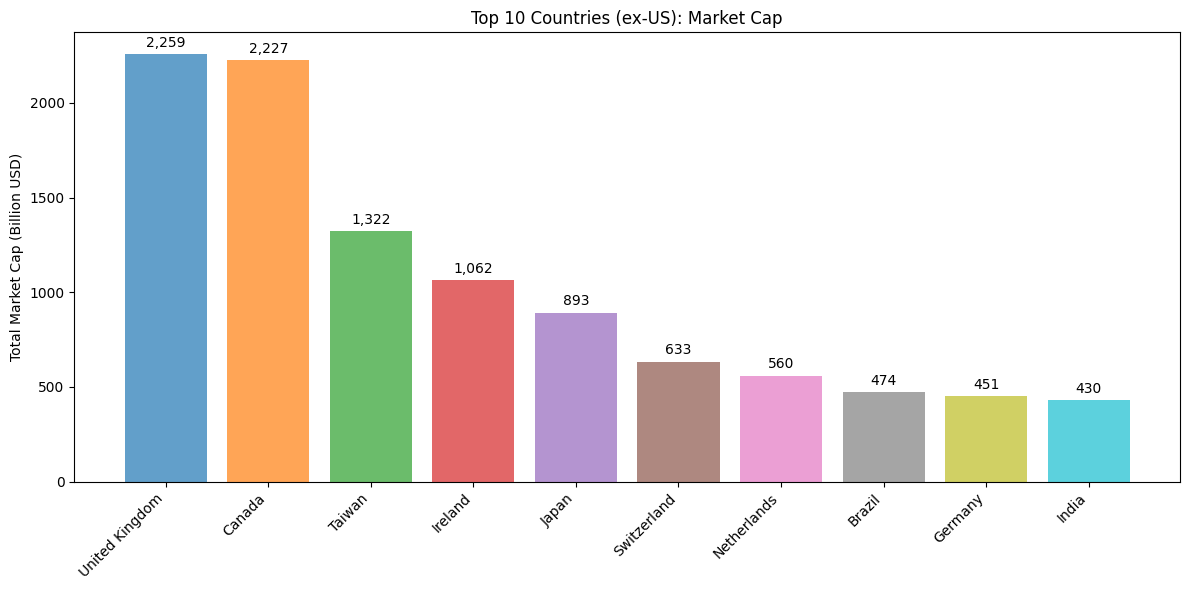

In [50]:
# Group by 'Country', sum 'Market_Cap', exclude US
country_agg = (
    data[data['Country'] != 'United States']
    .groupby('Country')
    .agg({'Market_Cap': 'sum'})
    .sort_values('Market_Cap', ascending=False)
)

# Filter to top 10 countries by Market Cap
top10 = country_agg.head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Market Cap with different colors for each bar
x = np.arange(len(top10.index))
# Use a colormap to get different colors for each bar
cmap = plt.get_cmap('tab10')
bar_colors = [cmap(i % 10) for i in range(len(top10.index))]
bars = ax1.bar(x, top10['Market_Cap'], color=bar_colors, alpha=0.7)

# Add values on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.annotate(f'{height:,.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, color='black', rotation=0)

ax1.set_ylabel('Total Market Cap (Billion USD)')
ax1.tick_params(axis='y')
ax1.set_xticks(x)
ax1.set_xticklabels(top10.index, rotation=45, ha='right')
ax1.set_title('Top 10 Countries (ex-US): Market Cap')
ax1.grid(False)

plt.tight_layout()
plt.show()



<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.12 Top 10 Stocks by Dividend in S&P 500 and Non in S&P 500 with line for 52 Week Change
</div>

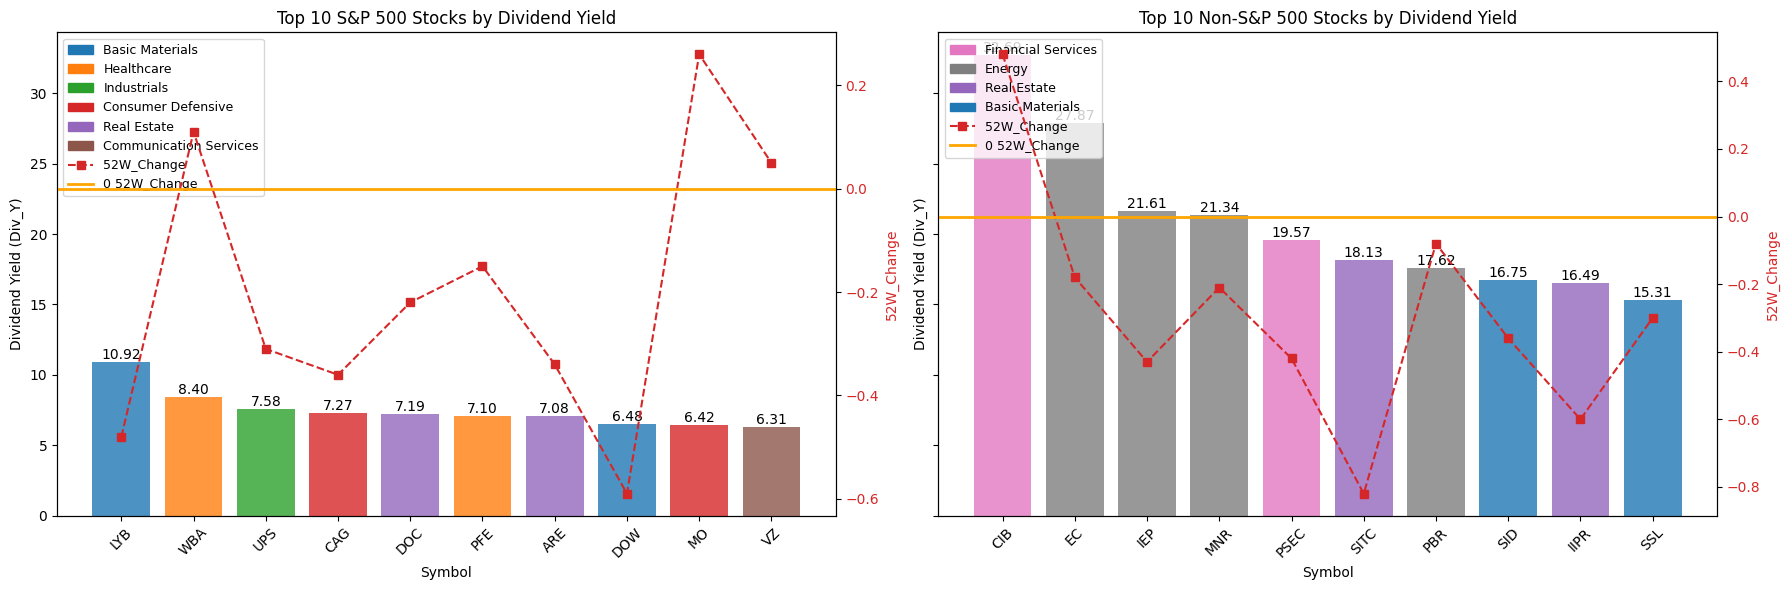

In [36]:
# Top 10 S&P 500 and non-S&P 500 stocks by Dividend Yield (Div_Y) - Bar Charts side by side
# Each ticker's bar color is based on its sector

import matplotlib.patches as mpatches

sp500_mask = data['SP500'] == 'S&P 500'
nonsp500_mask = data['SP500'] != 'S&P 500'

top10_divy_sp500 = (
    data.loc[sp500_mask]
        .sort_values('Div_Y', ascending=False)
        .head(10)
        .loc[:, ['Company_Name', 'Symbol', 'Div_Y', 'Sector', '52W_Change']]
        .reset_index(drop=True)
)

top10_divy_nonsp500 = (
    data.loc[nonsp500_mask]
        .sort_values('Div_Y', ascending=False)
        .head(10)
        .loc[:, ['Company_Name', 'Symbol', 'Div_Y', 'Sector', '52W_Change']]
        .reset_index(drop=True)
)

# Assign a color to each sector
all_sectors = pd.concat([top10_divy_sp500['Sector'], top10_divy_nonsp500['Sector']]).unique()
sector_cmap = plt.get_cmap('tab10')
sector_colors = {sector: sector_cmap(i % 10) for i, sector in enumerate(all_sectors)}

sp500_bar_colors = top10_divy_sp500['Sector'].map(sector_colors)
nonsp500_bar_colors = top10_divy_nonsp500['Sector'].map(sector_colors)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# S&P 500 plot
bars1 = axes[0].bar(
    top10_divy_sp500['Symbol'],
    top10_divy_sp500['Div_Y'],
    color=sp500_bar_colors,
    alpha=0.8,
    label='Dividend Yield'
)
axes[0].set_ylabel('Dividend Yield (Div_Y)')
axes[0].set_xlabel('Symbol')
axes[0].set_title('Top 10 S&P 500 Stocks by Dividend Yield')
axes[0].set_xticks(range(len(top10_divy_sp500['Symbol'])))
axes[0].set_xticklabels(top10_divy_sp500['Symbol'], rotation=45)
for bar, val in zip(bars1, top10_divy_sp500['Div_Y']):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{val:.2f}",
        ha='center', va='bottom', fontsize=10
    )
# Second y-axis for 52W_Change (now correctly aligned)
ax3 = axes[0].twinx()
line1, = ax3.plot(
    top10_divy_sp500['Symbol'],
    top10_divy_sp500['52W_Change'],
    color='tab:red',
    marker='s',
    linestyle='--',
    label='52W_Change'
)
hline1 = ax3.axhline(0, color='orange', linestyle='-', linewidth=2, label='0 52W_Change')
ax3.set_ylabel('52W_Change', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')

# Legends for S&P 500 plot
sector_patches = [mpatches.Patch(color=sector_colors[sector], label=sector) for sector in top10_divy_sp500['Sector'].unique()]
handles = sector_patches + [
    plt.Line2D([], [], color='tab:red', marker='s', linestyle='--', label='52W_Change'),
    plt.Line2D([], [], color='orange', linestyle='-', linewidth=2, label='0 52W_Change')
]
axes[0].legend(handles=handles, loc='upper left', fontsize=9)

# Non-S&P 500 plot
bars2 = axes[1].bar(
    top10_divy_nonsp500['Symbol'],
    top10_divy_nonsp500['Div_Y'],
    color=nonsp500_bar_colors,
    alpha=0.8,
    label='Dividend Yield'
)
axes[1].set_ylabel('Dividend Yield (Div_Y)')
axes[1].set_xlabel('Symbol')
axes[1].set_title('Top 10 Non-S&P 500 Stocks by Dividend Yield')
axes[1].set_xticks(range(len(top10_divy_nonsp500['Symbol'])))
axes[1].set_xticklabels(top10_divy_nonsp500['Symbol'], rotation=45)
for bar, val in zip(bars2, top10_divy_nonsp500['Div_Y']):
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{val:.2f}",
        ha='center', va='bottom', fontsize=10
    )
# Second y-axis for 52W_Change (now correctly aligned)
ax4 = axes[1].twinx()
line2, = ax4.plot(
    top10_divy_nonsp500['Symbol'],
    top10_divy_nonsp500['52W_Change'],
    color='tab:red',
    marker='s',
    linestyle='--',
    label='52W_Change'
)
hline2 = ax4.axhline(0, color='orange', linestyle='-', linewidth=2, label='0 52W_Change')
ax4.set_ylabel('52W_Change', color='tab:red')
ax4.tick_params(axis='y', labelcolor='tab:red')

# Legends for Non-S&P 500 plot
sector_patches2 = [mpatches.Patch(color=sector_colors[sector], label=sector) for sector in top10_divy_nonsp500['Sector'].unique()]
handles2 = sector_patches2 + [
    plt.Line2D([], [], color='tab:red', marker='s', linestyle='--', label='52W_Change'),
    plt.Line2D([], [], color='orange', linestyle='-', linewidth=2, label='0 52W_Change')
]
axes[1].legend(handles=handles2, loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()



<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.13 Earnings vs Revenue

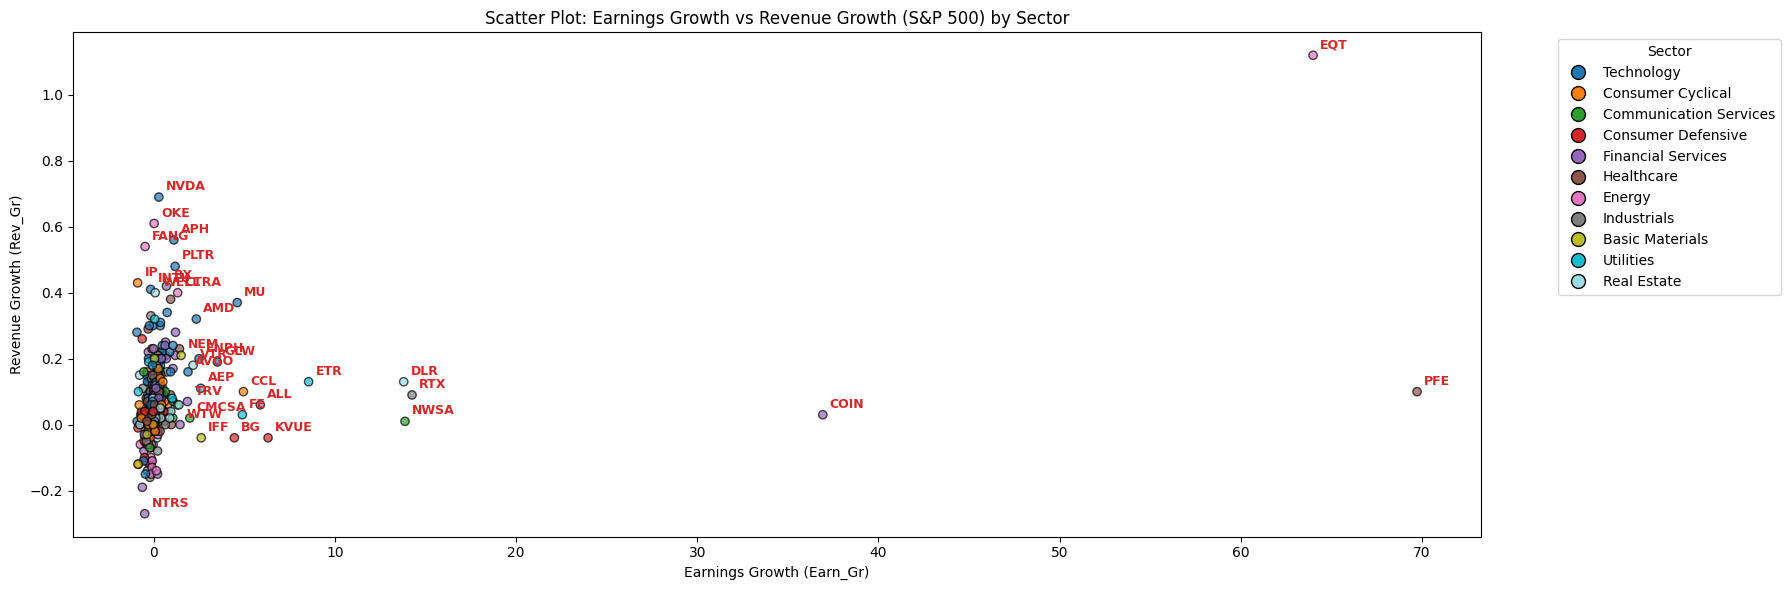

In [37]:


import matplotlib.colors as mcolors

# Filter for S&P 500 companies
sp500_mask = data['SP500'] == 'S&P 500'
sp500_data = data.loc[sp500_mask]

x = sp500_data['Earn_Gr']
y = sp500_data['Rev_Gr']
sectors = sp500_data['Sector']

# Assign a color to each sector using the new recommended colormap API
unique_sectors = sectors.unique()
# Use the new Matplotlib colormap API (>=3.7)
cmap = plt.colormaps['tab20']
# Get a list of colors from the colormap, one for each sector
color_list = [cmap(i / max(len(unique_sectors)-1, 1)) for i in range(len(unique_sectors))]
sector_color_dict = {sector: color_list[i] for i, sector in enumerate(unique_sectors)}
colors = sectors.map(sector_color_dict)

plt.figure(figsize=(18, 6))
scatter = plt.scatter(
    x,
    y,
    alpha=0.7,
    c=colors,
    edgecolor='k'
)
plt.xlabel('Earnings Growth (Earn_Gr)')
plt.ylabel('Revenue Growth (Rev_Gr)')
plt.title('Scatter Plot: Earnings Growth vs Revenue Growth (S&P 500) by Sector')

# Create a legend for sectors
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=sector,
               markerfacecolor=sector_color_dict[sector], markersize=10, markeredgecolor='k')
    for sector in unique_sectors
]
plt.legend(handles=handles, title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Identify serious outliers: 3*IQR rule for both axes
def get_serious_outlier_mask(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 3 * iqr
    upper = q3 + 3 * iqr
    return (series < lower) | (series > upper)

serious_outlier_mask = get_serious_outlier_mask(x) | get_serious_outlier_mask(y)
serious_outliers = sp500_data[serious_outlier_mask]

# Annotate only serious outliers with ticker (Symbol)
for _, row in serious_outliers.iterrows():
    plt.annotate(
        row['Symbol'],
        (row['Earn_Gr'], row['Rev_Gr']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='tab:red',
        weight='bold'
    )

plt.tight_layout()
plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.14 Market Cap vs Enterprise Value
</div>

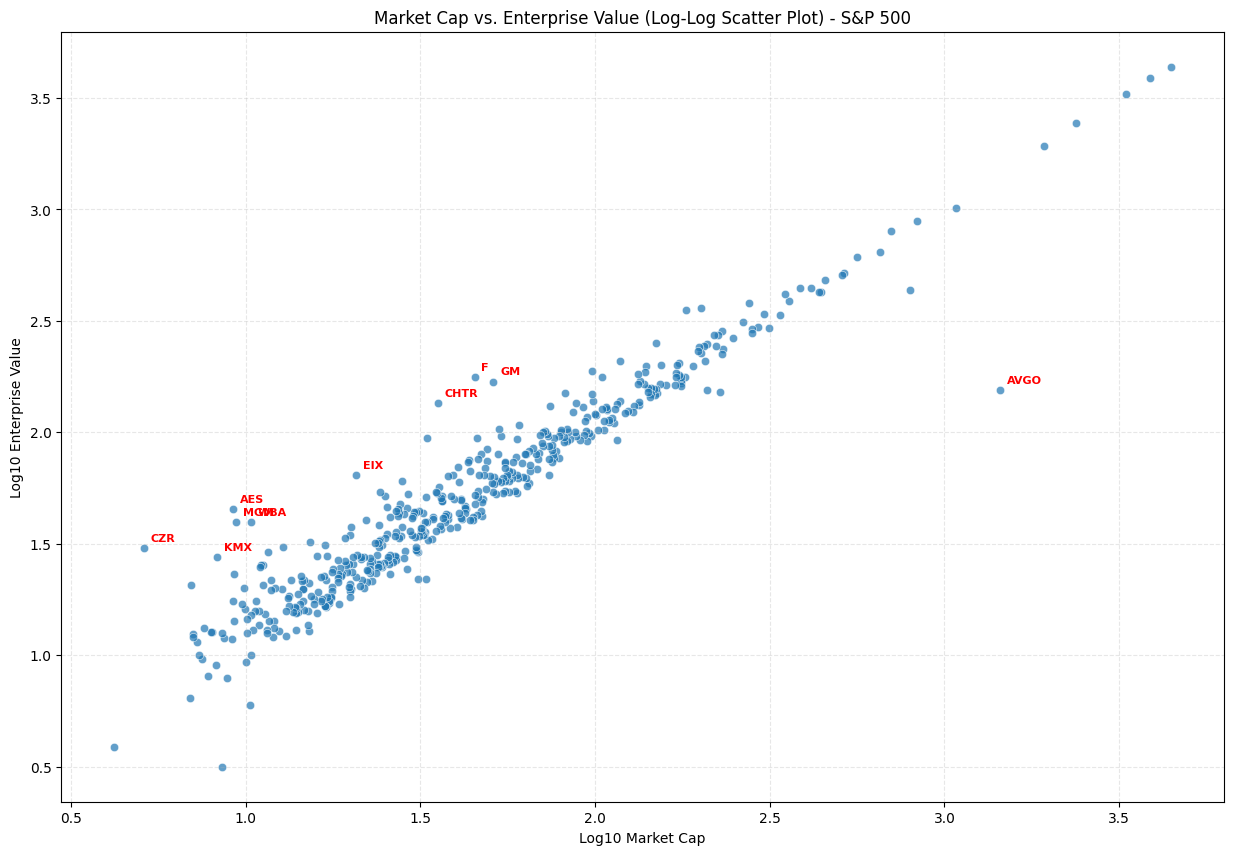

In [38]:
# Filter for S&P 500 companies
sp500_data = data[data['SP500'] == 'S&P 500'].copy()

# Remove non-positive values before log transform
sp500_data = sp500_data[(sp500_data['Market_Cap'] > 0) & (sp500_data['Ent_Value'] > 0)]

# Log transform
sp500_data['log_Market_Cap'] = np.log10(sp500_data['Market_Cap'])
sp500_data['log_Ent_Value'] = np.log10(sp500_data['Ent_Value'])

plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x='log_Market_Cap', 
    y='log_Ent_Value', 
    data=sp500_data, 
    alpha=0.7
)
plt.xlabel('Log10 Market Cap')
plt.ylabel('Log10 Enterprise Value')
plt.title('Market Cap vs. Enterprise Value (Log-Log Scatter Plot) - S&P 500')
plt.grid(True, linestyle='--', alpha=0.3)

# Identify outliers: those farthest from the y=x line in log space
residuals = (sp500_data['log_Ent_Value'] - sp500_data['log_Market_Cap']).abs()
outlier_count = 10 if len(sp500_data) > 10 else len(sp500_data)
outlier_idx = residuals.nlargest(outlier_count).index

for i in outlier_idx:
    row = sp500_data.loc[i]
    plt.annotate(
        row['Symbol'],
        (row['log_Market_Cap'], row['log_Ent_Value']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=8,
        color='red',
        weight='bold'
    )

plt.show()


<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">6.15 Trailing Price to Earnings vs Feature Price to Earnings

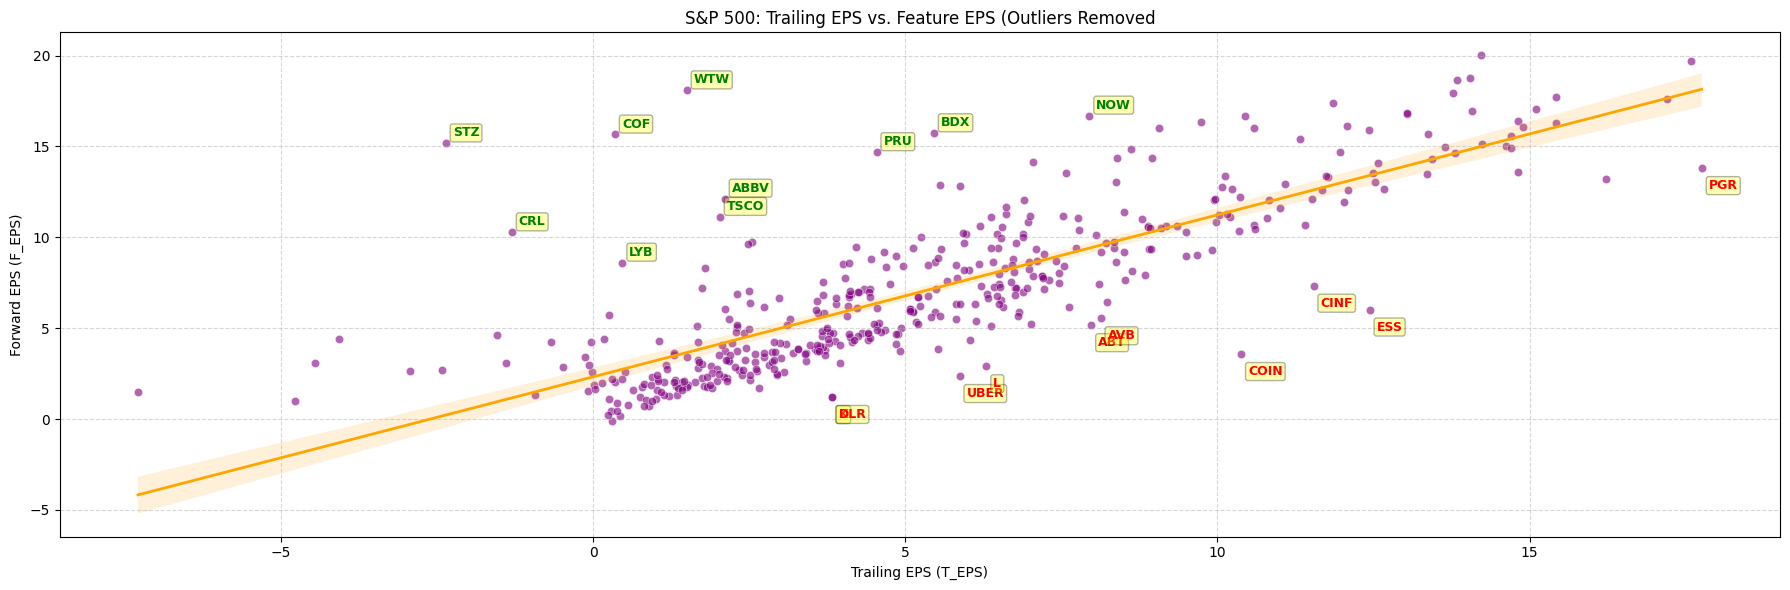

In [39]:

# Filter for S&P 500 companies
sp500_data = data[data['SP500'] == 'S&P 500']

# Remove outliers using the IQR method for both T_EPS and F_EPS
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

cols = ['T_EPS', 'F_EPS']
sp500_eps = sp500_data[['T_EPS', 'F_EPS', 'Symbol', 'Company_Name']].dropna()
sp500_eps_no_outliers = remove_outliers_iqr(sp500_eps, ['T_EPS', 'F_EPS'])

# Fit regression line
from scipy.stats import linregress
reg = linregress(sp500_eps_no_outliers['T_EPS'], sp500_eps_no_outliers['F_EPS'])
slope, intercept = reg.slope, reg.intercept

# Calculate signed residuals (vertical distance from regression line)
sp500_eps_no_outliers = sp500_eps_no_outliers.copy()
sp500_eps_no_outliers['reg_pred'] = slope * sp500_eps_no_outliers['T_EPS'] + intercept
sp500_eps_no_outliers['residual'] = sp500_eps_no_outliers['F_EPS'] - sp500_eps_no_outliers['reg_pred']

# Annotate the top N farthest above and below the regression line
n_annotate = 10  # Increased from 5 to 10 for "more on both side" 
top_above = sp500_eps_no_outliers.nlargest(n_annotate, 'residual')
top_below = sp500_eps_no_outliers.nsmallest(n_annotate, 'residual')

plt.figure(figsize=(18,6))
sns.scatterplot(x='T_EPS', y='F_EPS', data=sp500_eps_no_outliers, color='purple', alpha=0.6)
sns.regplot(x='T_EPS', y='F_EPS', data=sp500_eps_no_outliers, scatter=False, color='orange', line_kws={'linewidth':2})

# Annotate the most "vertically away" points on both sides
for _, row in top_above.iterrows():
    plt.annotate(
        row['Symbol'],
        (row['T_EPS'], row['F_EPS']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='green',
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.3)
    )
for _, row in top_below.iterrows():
    plt.annotate(
        row['Symbol'],
        (row['T_EPS'], row['F_EPS']),
        textcoords="offset points",
        xytext=(5,-15),
        ha='left',
        fontsize=9,
        color='red',
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.3)
    )

plt.title('S&P 500: Trailing EPS vs. Feature EPS (Outliers Removed')
plt.xlabel('Trailing EPS (T_EPS)')
plt.ylabel('Forward EPS (F_EPS)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="background-color: #e8d21d; color: #000000; font-size: 18px; padding: 5px;">7. Conclusion